In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
data2 = pd.read_csv("data2.csv",parse_dates=[1])
#IMPORTATION DF DATA2 (NETTOYE) SUR LEQUEL CHAQUE LIGNE REPRESENTE LA TRANSACTION D'UN PRODUIT VENDU

In [147]:
del data2["Unnamed: 0"]
data2.shape

(336713, 11)

In [148]:
data2['categ'] = data2['categ'].astype(int)
data2['categ'] = data2['categ'].astype(str)
data2['age'] = data2['age'].astype(int)

In [149]:
###################################

########## ANALYSES ###############

######### GRAPHIQUES ##############

###################################

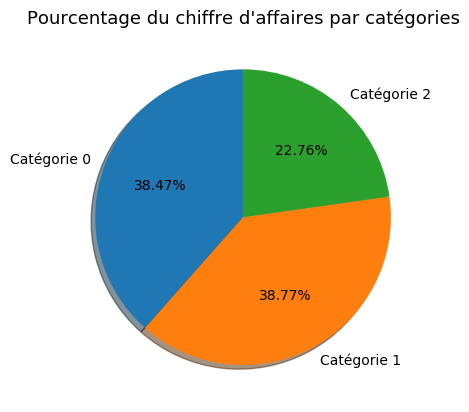

In [150]:
plt.style.use('default')
toto = data2.groupby("categ")["price"].sum().copy()
plt.title("Pourcentage du chiffre d'affaires par catégories", fontsize=13)
plt.rcParams["figure.figsize"]=[5,5]
plt.pie(toto.values, labels=["Catégorie 0","Catégorie 1","Catégorie 2"],autopct='%1.2f%%',shadow=True,startangle=90, textprops={'fontsize': 10})
#plt.savefig("10a.jpg",bbox="tight")
plt.show()

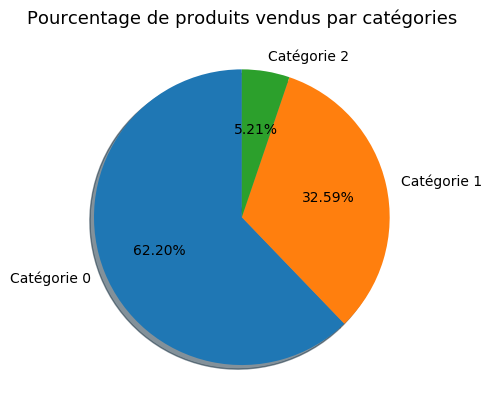

In [151]:
plt.style.use('default')
momo=data2['categ'].value_counts().copy()
plt.title("Pourcentage de produits vendus par catégories", fontsize=13)
plt.rcParams["figure.figsize"]=[5,5]
plt.pie(momo.values, labels=["Catégorie 0","Catégorie 1","Catégorie 2"],autopct='%1.2f%%',shadow=True,startangle=90, textprops={'fontsize': 10})
#plt.savefig("10b.jpg",bbox="tight")
plt.show()

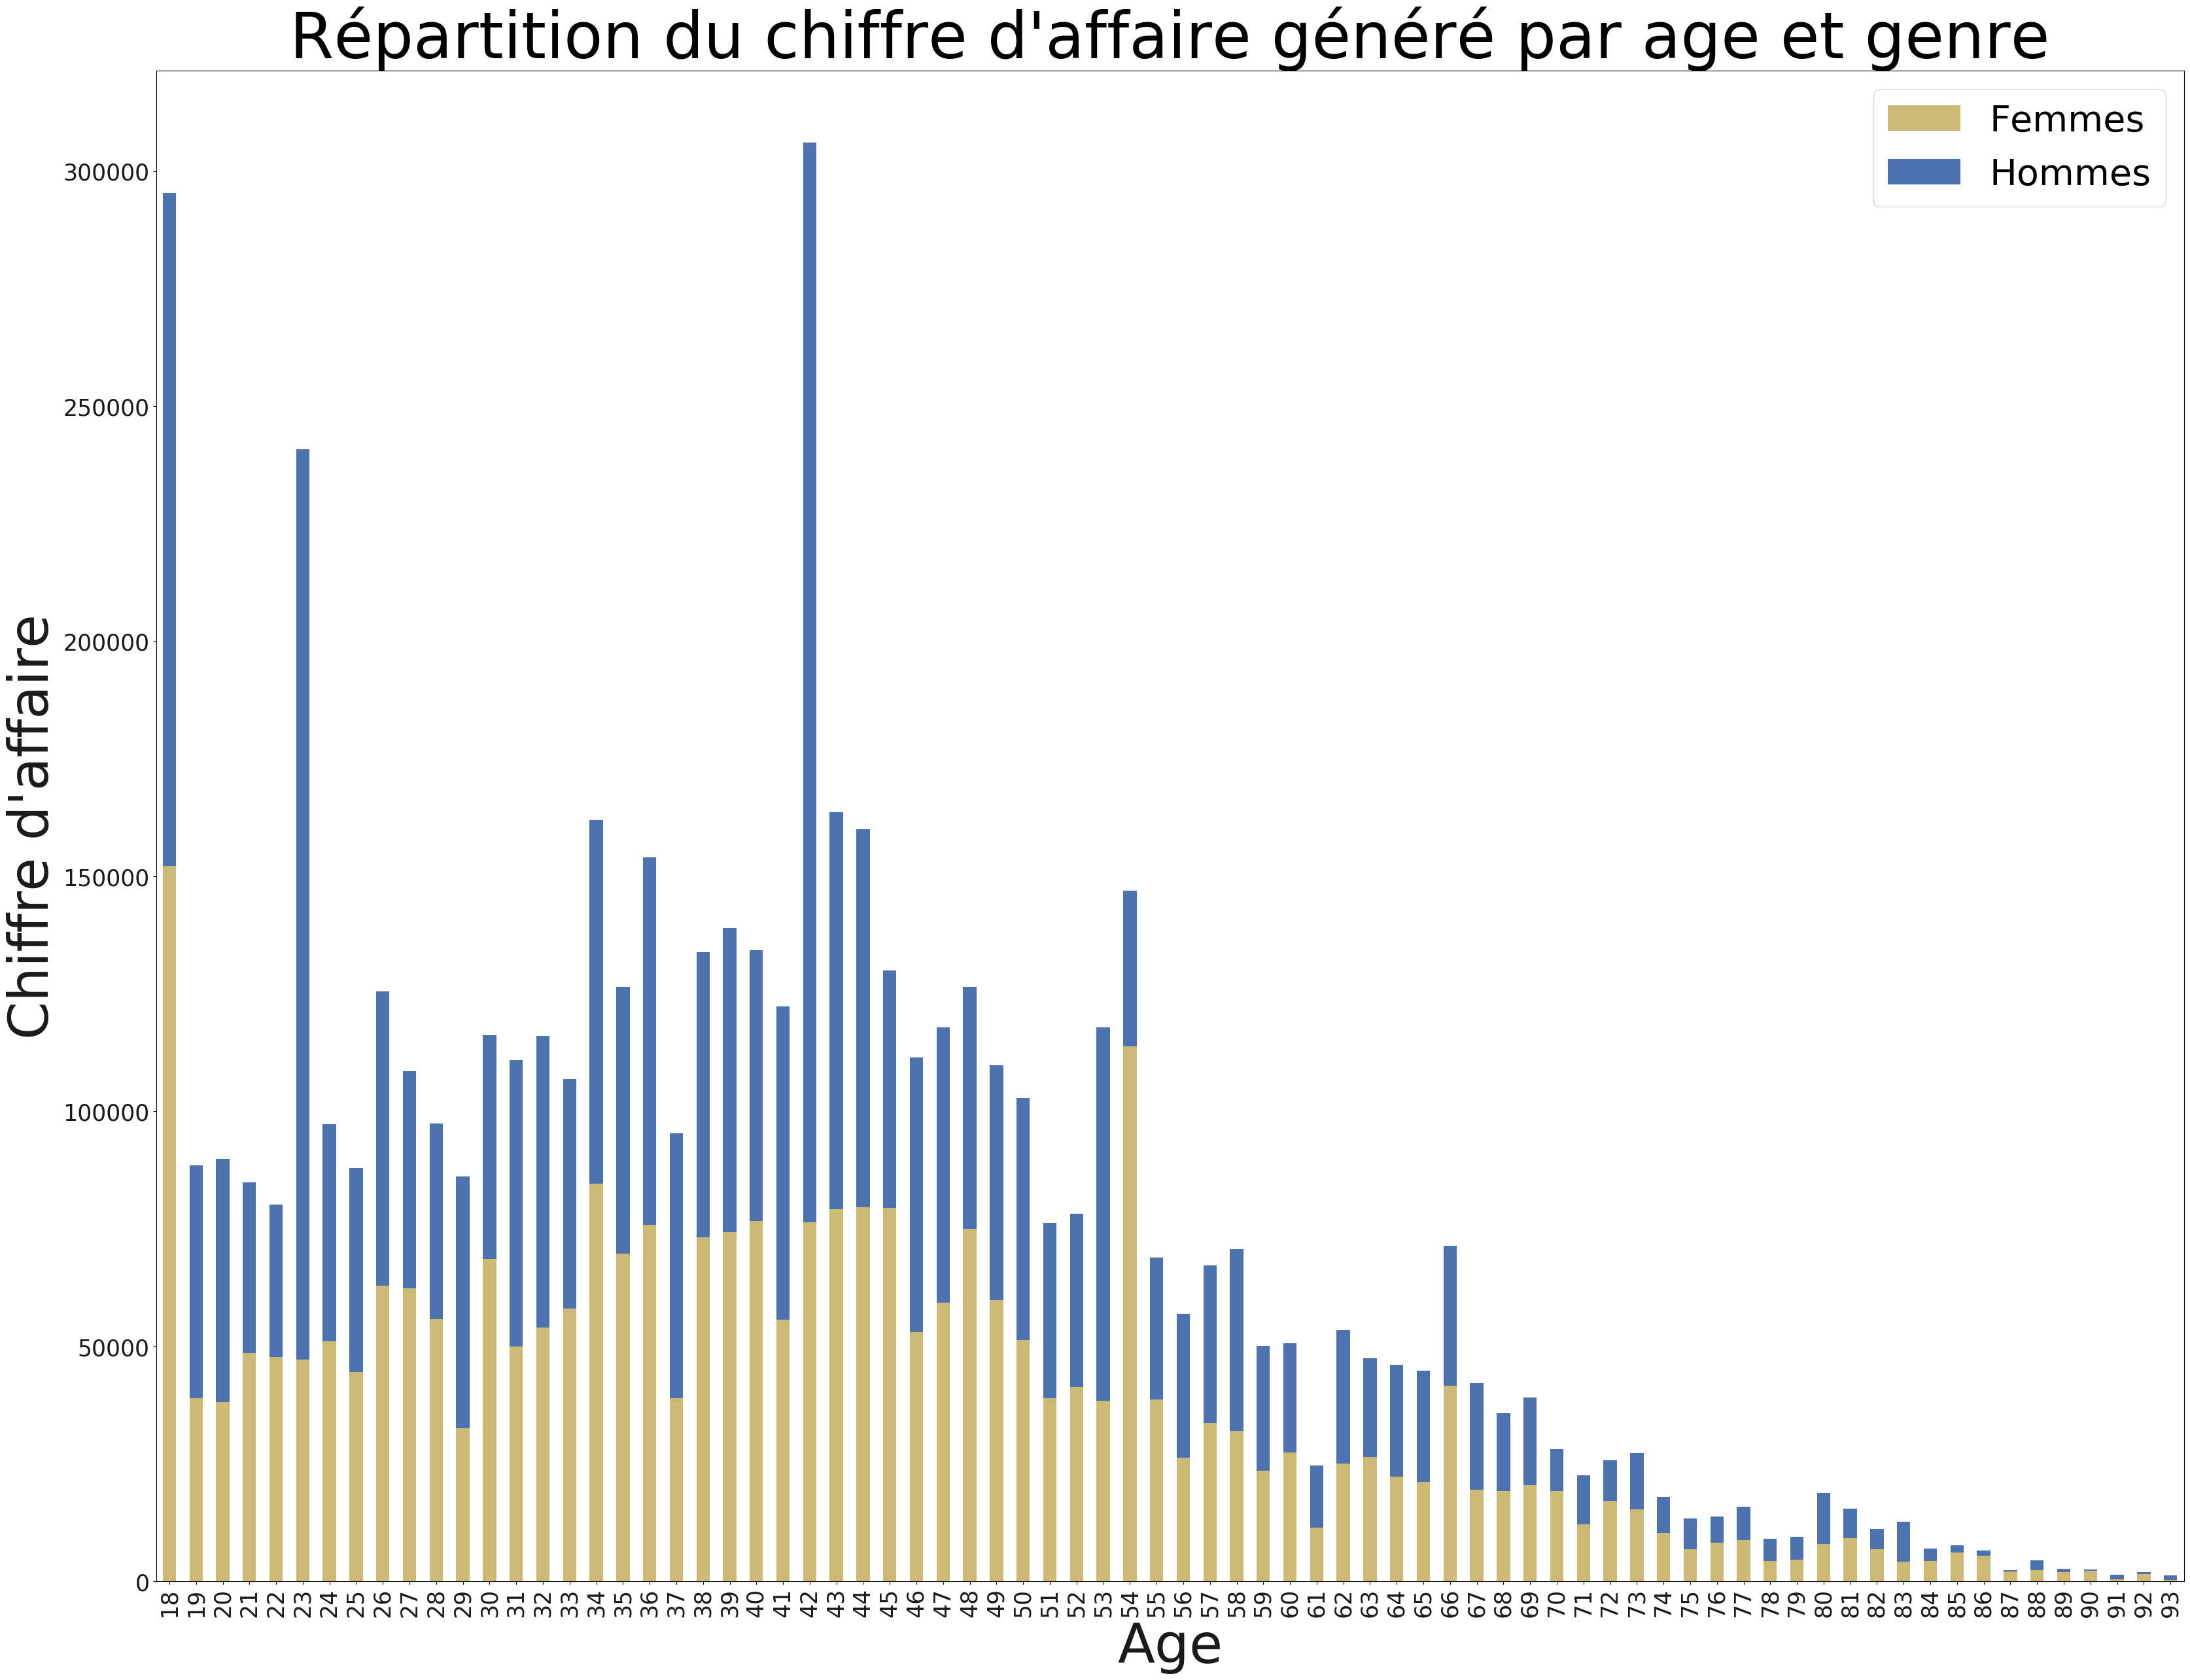

In [152]:
plt.style.use('default')
datax = data2.drop(['categ'], axis=1)
df_plot = datax.groupby(['sex', 'age']).sum().reset_index().pivot(columns='sex', index='age')
plt.rcParams["figure.figsize"]= 40,30
df_plot.plot(kind='bar', stacked=True, color=['y','b'])
plt.xticks(fontsize = 25,color='k', rotation = 90)
plt.yticks(fontsize = 25,color='k')
plt.ylabel("Chiffre d'affaire",color='k',fontsize=60)
plt.xlabel("Age", color='k',fontsize=60)
plt.title("Répartition du chiffre d'affaire généré par age et genre", fontsize=70)
plt.legend(fontsize = 40,labels=["Femmes","Hommes"])
#plt.savefig("11.jpg",bbox="tight")
plt.show()

In [153]:
#on remarque un CA en adequation avec le reste du graphique à 23 ans, 42 ans, 53 ans,
# 54 ans et 66 ans.
#data2.groupby('client_id')['price'].sum().sort_values().tail(10)

In [154]:
#CREATION DF datas (NETTOYE) SUR LEQUEL CHAQUE LIGNE REPRESENTE LA TRANSACTION D'UN PANIER
temp=data2.copy() #creation en regroupant montant panier(session)
del temp["fulldate"]
del temp["heure"]
datas = temp.pivot_table(
    index=["session_id","client_id","jour","mois","sex","age"], values=["price"], aggfunc=sum)
del temp
datas.reset_index(level='client_id', inplace=True)
datas.reset_index(level='jour', inplace=True)
datas.reset_index(level='mois', inplace=True)
datas.reset_index(level='sex', inplace=True)
datas.reset_index(level='age', inplace=True)
datas.sort_values("price", ascending = False, inplace=True)

#CREATION DF DATAC (NETTOYE) SUR LEQUEL CHAQUE LIGNE REPRESENTE UN CLIENT ET LE TOTAL DE SES ACHATS
temp=datas.copy() #creation en regroupant montants CA CLIENTS
temp.reset_index(inplace=True)
del temp["session_id"]
del temp["mois"]
del temp["jour"]
datac = temp.pivot_table(
    index=["client_id","sex","age"], values=["price"], aggfunc=sum)
del temp
datac.reset_index(level='client_id', inplace=True)
datac.reset_index(level='sex', inplace=True)
datac.reset_index(level='age', inplace=True)
datac.sort_values("price", ascending = False, inplace = True)
print(datac.shape)
datac.head(10)
#on remarque que les 4 premiers clients achetent beaucoups plus que les autres
#et que nous avons 8600 clients actifs
#Les 4 premiers correspondent aux gros client sur le graphique précédent et se detachent de loins des plus gros client
#qui les suivent

(8600, 4)


,age,sex,client_id,price
677,42,m,c_1609,162007.34
4388,23,m,c_4958,144257.21
6337,54,f,c_6714,73197.34
2724,53,m,c_3454,54442.92
7715,48,f,c_7959,2564.25
3870,38,f,c_4491,2540.53
7791,44,m,c_8026,2537.67
1268,45,f,c_2140,2527.01
8195,44,f,c_8392,2515.98
7120,44,m,c_7421,2511.98


In [155]:
c_1609_=datac[(datac["client_id"] == "c_1609")].copy()
c_4958_=datac[(datac["client_id"] == "c_4958")].copy()
c_6714_=datac[(datac["client_id"] == "c_6714")].copy()
c_3454_=datac[(datac["client_id"] == "c_3454")].copy()
top4 = pd.concat([c_1609_ , c_4958_ , c_6714_ , c_3454_])
print ("Les 4 clients qui ont acheté en gros ont dépensé: ", int(top4["price"].sum()) , "€ sur un chiffre d'affaire total de ", int(datac["price"].sum()) ,"€, et representent ", round(((top4["price"].sum()/datac["price"].sum())*100),2) ,"% des ventes.")

Les 4 clients qui ont acheté en gros ont dépensé:  433904 € sur un chiffre d'affaire total de  5796577 €, et representent  7.49 % des ventes.


In [156]:
#une fonction "traitement" va permettre de retirer les 4 gros clients qui theoriquement achetent en gros 
#(pour de la revente ou des groupes scolaires par ex) et ne font  donc pas parti des clients d'achats au détail
#et risque de perturber l'analyse : nous les retirons donc de nos données

def traitement(dataset):
    dataset = dataset[dataset["client_id"] != "c_1609"]
    dataset = dataset[dataset["client_id"] != "c_4958"]
    dataset = dataset[dataset["client_id"] != "c_6714"]
    dataset = dataset[dataset["client_id"] != "c_3454"]
    return dataset

data2=traitement(data2)
datas=traitement(datas)
datac=traitement(datac)

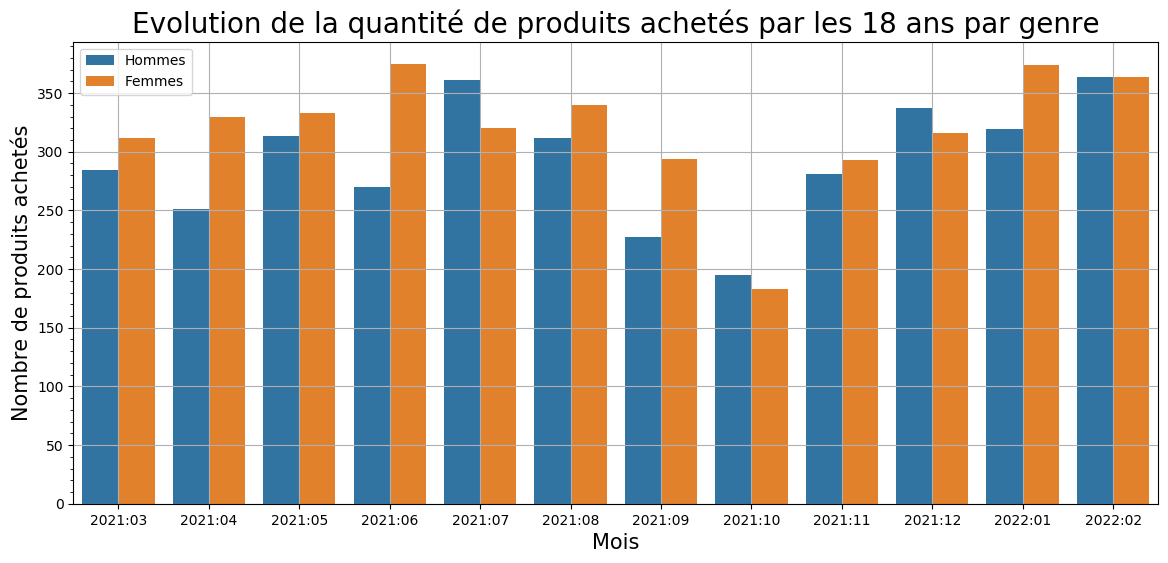

In [157]:
#sns.reset_defaults()
plt.style.use('default')
y_18=data2[(data2["age"] == 18)].copy()
plt.rcParams["figure.figsize"]=[14,6]
sns.countplot(x="mois",data=y_18,hue="sex", order=('2021:03','2021:04','2021:05','2021:06','2021:07','2021:08','2021:09','2021:10','2021:11','2021:12','2022:01','2022:02'))
plt.title("Evolution de la quantité de produits achetés par les 18 ans par genre", fontsize=20)
plt.xlabel("Mois",fontsize=15)
plt.ylabel("Nombre de produits achetés",fontsize=15)
plt.gca().yaxis.set_ticks(range(0, 400, 10), minor = True)
plt.legend(loc=2,labels=["Hommes","Femmes"], fontsize=10)
plt.grid(True)
#plt.savefig("12.jpg",bbox="tight")
plt.show()
#on verifie les 18 ans.....

In [158]:
#on peut considerer que les client de 18 ans sont également composés de clienst d'age inferieur
#qui ne peuvent acheter sur ce site internet car mineurs.

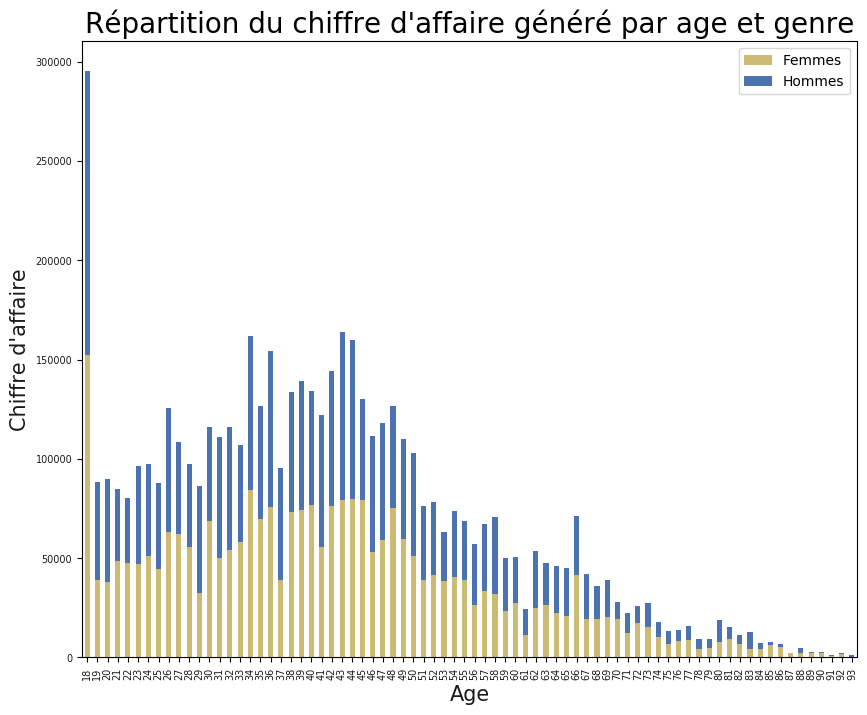

In [159]:
sns.reset_defaults()
datax = data2.drop(['categ'], axis=1)
df_plot = datax.groupby(['sex', 'age']).sum().reset_index().pivot(columns='sex', index='age')
plt.rcParams["figure.figsize"]=[10,8]
df_plot.plot(kind='bar', stacked=True, color=['y','b'])
plt.xticks(fontsize = 7,color='k', rotation = 90)
plt.yticks(fontsize = 7,color='k')
plt.ylabel("Chiffre d'affaire",color='k',fontsize=15)
plt.xlabel("Age", color='k',fontsize=15)
plt.title("Répartition du chiffre d'affaire généré par age et genre", fontsize=20)
plt.legend(fontsize = 10,labels=["Femmes","Hommes"])
#plt.savefig("13.jpg",bbox="tight")
plt.show()

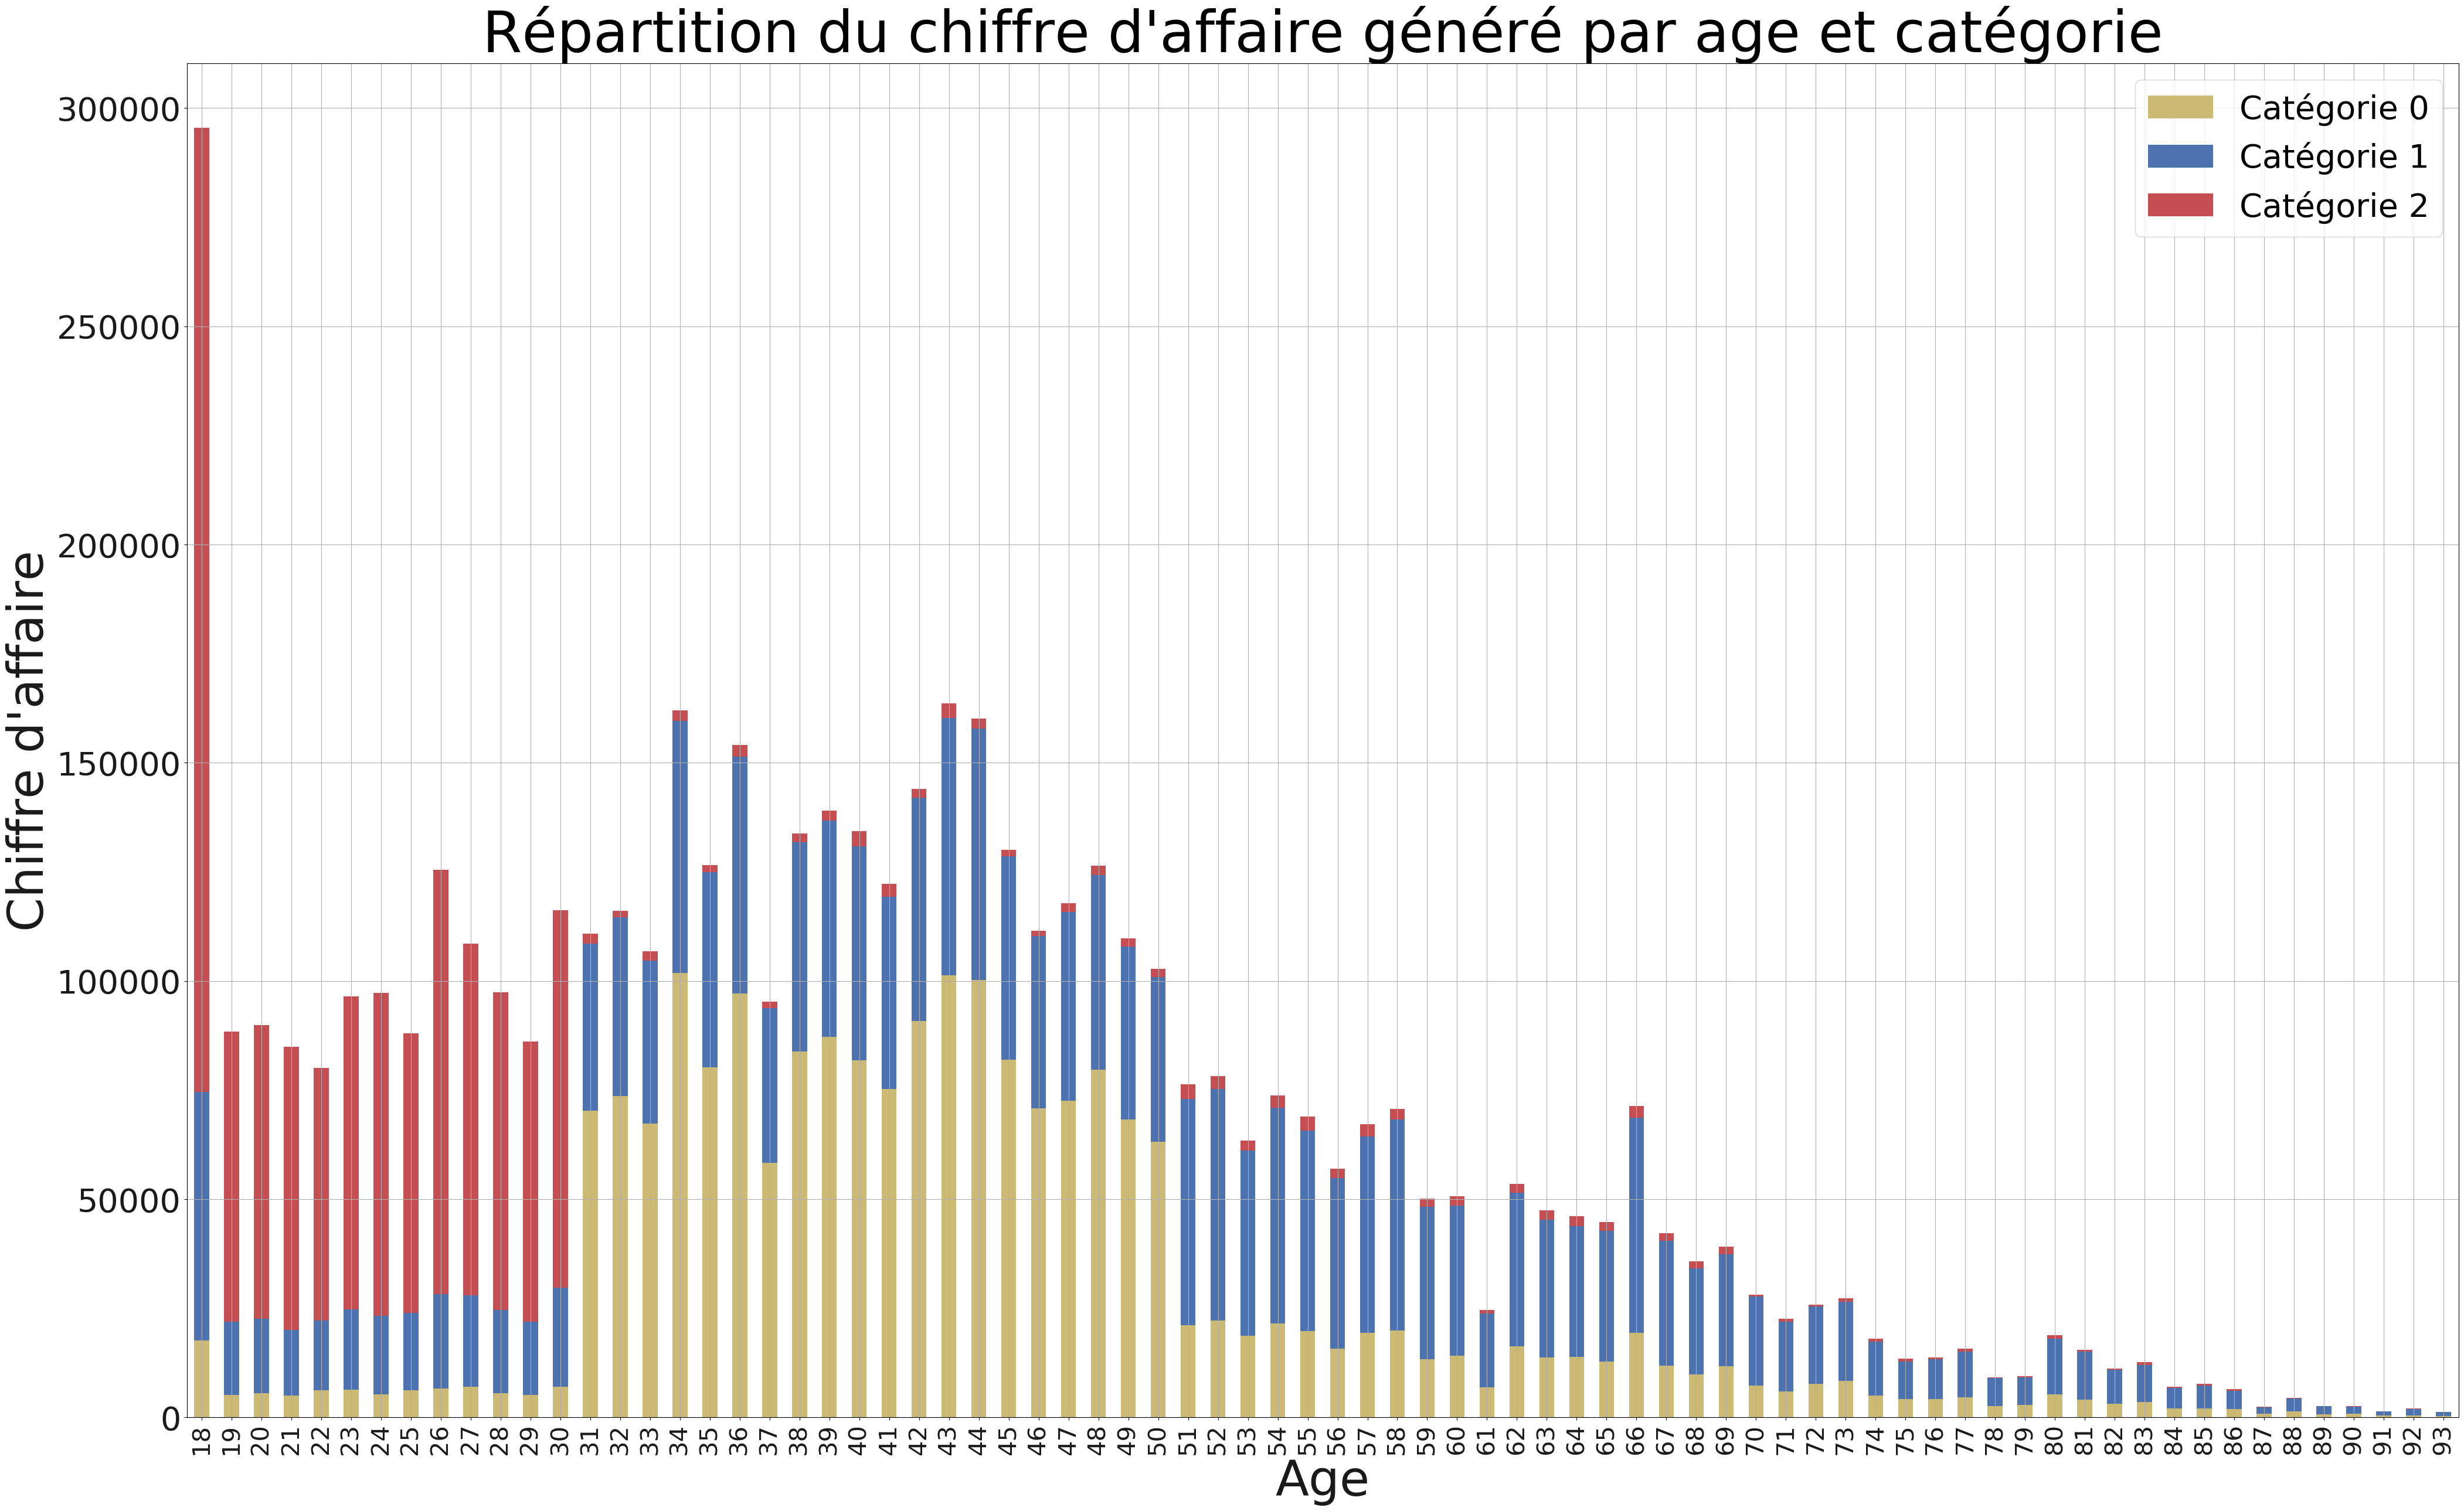

In [160]:
sns.reset_defaults()
plt.rcParams["figure.figsize"]=[50,30]
df_plot = data2.groupby(['categ', 'age']).sum().reset_index().pivot(columns='categ', index='age')
df_plot.plot(kind='bar', stacked=True, color=['y','b','r'])
plt.xticks(fontsize = 30,color='k', rotation = 90)
plt.yticks(fontsize = 40,color='k')
plt.ylabel("Chiffre d'affaire",color='k',fontsize=60)
plt.xlabel("Age", color='k',fontsize=60)
plt.title("Répartition du chiffre d'affaire généré par age et catégorie", fontsize=70)
plt.legend(fontsize = 40,labels=["Catégorie 0","Catégorie 1","Catégorie 2"])
plt.grid(True)
#plt.savefig("14.jpg",bbox="tight")
plt.show()

In [161]:
#on remarque 4 tranches d'ages 18 / 19-30 / 31-50 / 51-93 aux habitudes differentes
#on crée une fonction afin de les mettre en evidence :  _by4(dataset)
#fonction qui permet d ajouter une colonne 'tranche d'age'
def _by4(dataset):
    print("Ajout de 4 tranches d'ages")
    def groupe_age(x):
        if x <= 18:
            return '18 et -'
        
        elif x >= 19 and x <= 30:
            return '19-30'
        
        elif x >= 31 and x <= 50:
            return '31-50'
        
        elif x >= 51:
            return '51 et +'
    dataset['groupe_age'] = dataset['age'].apply(lambda x: groupe_age(x))
    dataset.sort_values("groupe_age", inplace = True)
    plt.show()
    return dataset

In [162]:
#fonction analyse de de tendances centrales, dispersion et mesures de formes du prix

def infos_ga(dataset):
    dataset.sort_values("price", inplace = True)
    print("le panier minimum est à ",dataset.price.min()," €.")
    print("le panier maximum est à ",round(dataset.price.max(),2)," €.")
    print("achat moyenne: ",round(dataset['price'].mean(),2))
    print("achat médian ",round(dataset['price'].median(),2))
    print("Mode:\n",dataset.price.mode())
    print("Variance:\n",dataset.price.var(ddof=0))
    print("Ecart-type:\n",dataset.price.std(ddof=0))
    #print("skewness empirique:\n",dataset.price.skew())
    #print("kurtosis empirique:\n",dataset.price.kurtosis())
    #print("nous avons", len(dataset) ,"produits distincts")
    #print("nombre de references par categorie ")
    #print (products['categ'].value_counts())
    #print("nombre de Nan :")
    #print(products.isna().sum())
    for cat in dataset['groupe_age'].unique():
        subset = dataset[dataset.groupe_age == cat] # Création du sous-échantillon
        print("-"*20)
        print("Pour les ",(cat),".")
        print (len(subset['groupe_age']),"clients.")
        print("achat moyenne: ",round(subset['price'].mean(),2))
        print("achat médian ",round(subset['price'].median(),2))
        print("Mode: ",round(subset['price'].mode()[0],2))
        print("Variance: ",round(subset['price'].var(ddof=0),2))
        print("Ecart-type: ",round(subset['price'].std(ddof=0),2))
        #    print("skewness empirique:\n",subset['price'].skew())
        #    print("kurtosis empirique:\n",subset['price'].kurtosis())
        print("Minimum: ",round(subset['price'].min(),2)," €.")
        print("Maximum: ",round(subset['price'].max(),2)," €.")
        #    print(dataset.corr())
        #    sns.reset_defaults()
        #    dataset.boxplot(column="groupe_age", vert=False, showmeans=True,meanline=True,showfliers=False)
        #    plt.show()
        #    dataset["groupe_age"].hist()
        #    plt.show()

In [163]:
#fonction analyse de de tendances centrales, dispersion et mesures de formes du nombres de paniers

def infos_ga2(dataset):
    dataset.sort_values("s_qty", inplace = True)
    print("le nombre d'achats' minimum est de ",dataset.s_qty.min())
    print("le nombre d'achats' maximum est de ",dataset.s_qty.max())
    print("nb achats moyenne: ",round(dataset['s_qty'].mean(),2))
    print("nb achats médian: ",round(dataset['s_qty'].median(),2))
    print("Mode:\n",dataset.s_qty.mode())
    print("Variance:\n",dataset.s_qty.var(ddof=0))
    print("Ecart-type:\n",dataset.s_qty.std(ddof=0))
    #print("skewness empirique:\n",dataset.price.skew())
    #print("kurtosis empirique:\n",dataset.price.kurtosis())
    #print("nous avons", len(dataset) ,"produits distincts")
    #print("nombre de references par categorie ")
    #print (products['categ'].value_counts())
    #print("nombre de Nan :")
    #print(products.isna().sum())
    for cat in dataset['groupe_age'].unique():
        subset = dataset[dataset.groupe_age == cat] # Création du sous-échantillon
        print("-"*20)
        print("Achats pour les ",(cat),".")
        print (len(subset['groupe_age']),"clients.")
        print("nb achats moyenne: ",round(subset['s_qty'].mean(),2))
        print("nb achats médian ",round(subset['s_qty'].median(),2))
        print("Mode: ",subset['s_qty'].mode()[0])
        print("Variance: ",round(subset['s_qty'].var(ddof=0),2))
        print("Ecart-type: ",round(subset['s_qty'].std(ddof=0),2))
        #    print("skewness empirique:\n",subset['price'].skew())
        #    print("kurtosis empirique:\n",subset['price'].kurtosis())
        print("Minimum: ",(subset['s_qty'].min()))
        print("Maximum: ",(subset['s_qty'].max()))
        #    print(dataset.corr())
        #    sns.reset_defaults()
        #    dataset.boxplot(column="groupe_age", vert=False, showmeans=True,meanline=True,showfliers=False)
        #    plt.show()
        #    dataset["groupe_age"].hist()
        #    plt.show()

In [164]:
#fonction analyse de de tendances centrales, dispersion et mesures de formes du nombres de produits dans le panier

def infos_ga3(dataset):
    dataset.sort_values("qty", inplace = True)
    print("Minimum d'articles par achat ",dataset.qty.min())
    print("Maximum d'articles par achat ",dataset.qty.max())
    print("nb articles moyenne: ",round(dataset['qty'].mean(),2))
    print("nb articles médiane: ",round(dataset['qty'].median(),2))
    print("Mode:\n",dataset.qty.mode())
    print("Variance:\n",dataset.qty.var(ddof=0))
    print("Ecart-type:\n",dataset.qty.std(ddof=0))
    for cat in dataset['groupe_age'].unique():
        subset = dataset[dataset.groupe_age == cat] # Création du sous-échantillon
        print("-"*20)
        print("Qté par panier pour les ",(cat),".")
        print (len(subset['groupe_age']),"clients.")
        print("qté moyenne: ",round(subset['qty'].mean(),2))
        print("qté médiane ",round(subset['qty'].median(),2))
        print("Mode: ",subset['qty'].mode()[0])
        print("Variance: ",round(subset['qty'].var(ddof=0),2))
        print("Ecart-type: ",round(subset['qty'].std(ddof=0),2))
        #    print("skewness empirique:\n",subset['price'].skew())
        #    print("kurtosis empirique:\n",subset['price'].kurtosis())
        print("Qté minimum: ",(subset['qty'].min()))
        print("Qté maximum: ",(subset['qty'].max()))
        #    print(dataset.corr())
        #    sns.reset_defaults()
        #    dataset.boxplot(column="groupe_age", vert=False, showmeans=True,meanline=True,showfliers=False)
        #    plt.show()
        #    dataset["groupe_age"].hist()
        #    plt.show()

In [165]:
#fonction analyse de de tendances centrales, dispersion et mesures de formes
#pour analyser les catégories des produits achetés en fonction de l'age du client

def infos_ga4(dataset):
    dataset.sort_values('age', inplace = True)
    print("Age minimum ",dataset.age.min())
    print("Age maximum ",dataset.age.max())
    print("age moyen: ",round(dataset['age'].mean(),2))
    print("age médian: ",round(dataset['age'].median(),2))
    print("Mode:\n",dataset.age.mode())
    print("Variance:\n",dataset.age.var(ddof=0))
    print("Ecart-type:\n",dataset.age.std(ddof=0))
    for cat in dataset['categ'].unique():
        subset = dataset[dataset.categ == cat] # Création du sous-échantillon
        print("-"*20)
        print("Pour la catégorie ",(cat),".")
        print (len(subset['categ']),"achats.")
        print("age moyen: ",round(subset['age'].mean(),2))
        print("age médian: ",round(subset['age'].median(),2))
        print("Mode: ",subset['age'].mode()[0])
        print("Variance: ",round(subset['age'].var(ddof=0),2))
        print("Ecart-type: ",round(subset['age'].std(ddof=0),2))
        #    print("skewness empirique:\n",subset['price'].skew())
        #    print("kurtosis empirique:\n",subset['price'].kurtosis())
        print("age minimum: ",(subset['age'].min()))
        print("age maximum: ",(subset['age'].max()))
        #    print(dataset.corr())
        #    sns.reset_defaults()
        #    dataset.boxplot(column="groupe_age", vert=False, showmeans=True,meanline=True,showfliers=False)
        #    plt.show()
        #    dataset["groupe_age"].hist()
        #    plt.show()

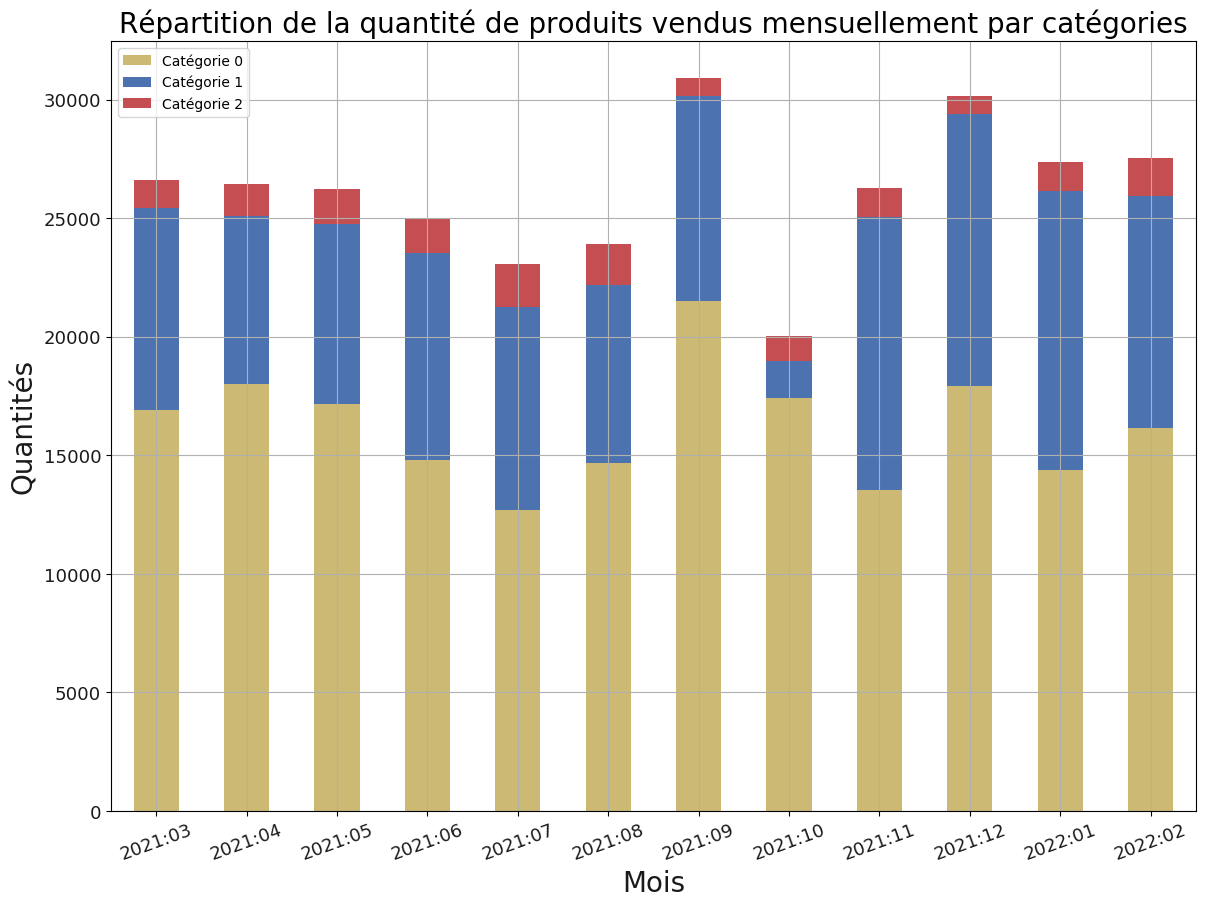

In [166]:
sns.reset_defaults()
df_plot = data2.groupby(['categ', 'mois']).size().reset_index().pivot(columns='categ', index='mois', values=0)
plt.rcParams["figure.figsize"]=[14,10]
df_plot.plot(kind='bar', stacked=True, color=['y','b','r'])
plt.xticks(fontsize = 13,color='k', rotation = 20)
plt.yticks(fontsize = 13,color='k')
plt.ylabel("Quantités",color='k',fontsize=20)
plt.xlabel("Mois", color='k',fontsize=20)
plt.title("Répartition de la quantité de produits vendus mensuellement par catégories", fontsize=20)
plt.legend(loc=2,labels=["Catégorie 0","Catégorie 1","Catégorie 2"])
plt.grid(True)
#plt.savefig("15.jpg",bbox="tight")
plt.show()

In [167]:
#en octobre 2021 on remarque une chute des quantités vendues produits de categorie 1

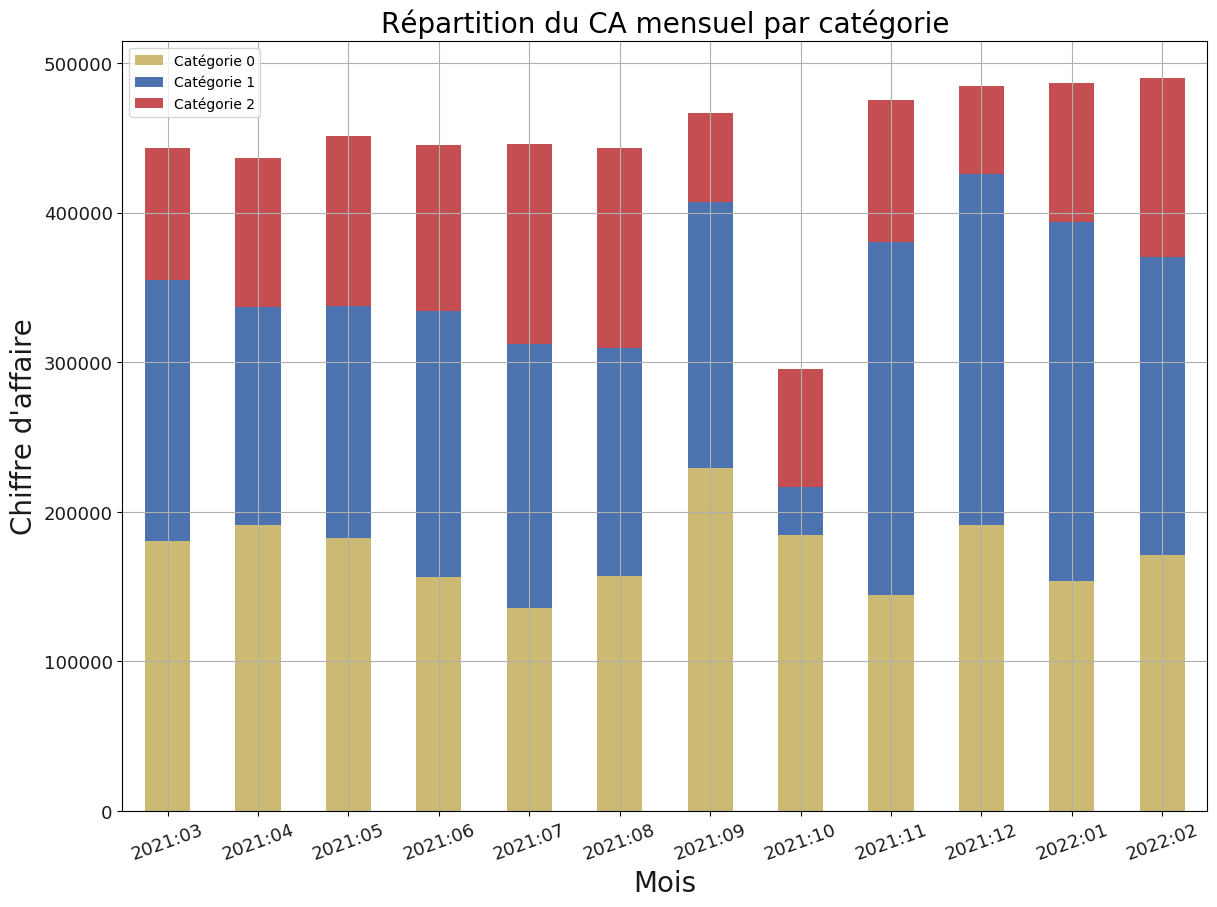

In [168]:
sns.reset_defaults()
datax = data2.drop(['age'], axis=1)
df_plot = datax.groupby(['categ', 'mois']).sum().reset_index().pivot(columns='categ', index='mois')
plt.rcParams["figure.figsize"]=[14,10]
df_plot.plot(kind='bar', stacked=True, color=['y', 'b','r'])
plt.xticks(fontsize = 13,color='k', rotation = 20)
plt.yticks(fontsize = 13,color='k')
plt.ylabel("Chiffre d'affaire",color='k',fontsize=20)
plt.xlabel("Mois", color='k',fontsize=20)
plt.title("Répartition du CA mensuel par catégorie", fontsize=20)
plt.legend(loc=2,labels=["Catégorie 0","Catégorie 1","Catégorie 2"])
plt.grid(True)
#plt.savefig("16.jpg",bbox="tight")
plt.show()

In [169]:
#et une grosse baisse de CA

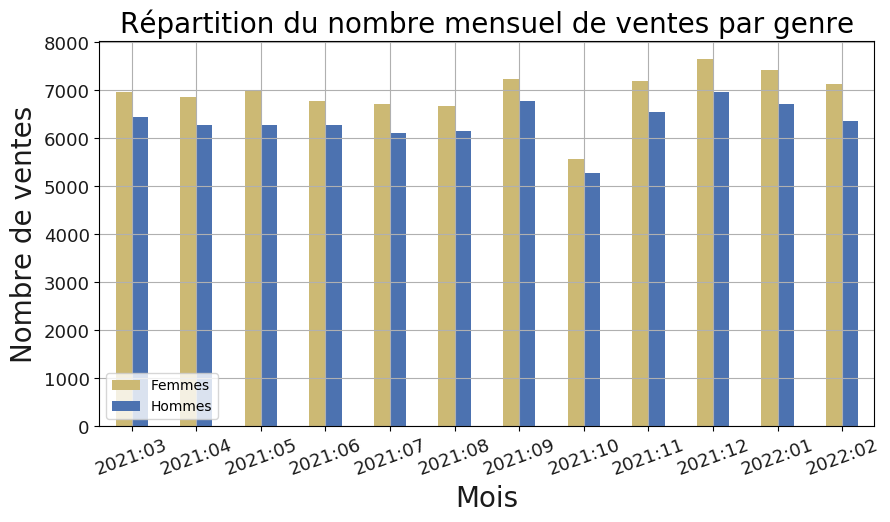

In [170]:
sns.reset_defaults()
df_plot = datas.groupby(['sex', 'mois']).size().reset_index().pivot(columns='sex', index='mois', values=0)
plt.rcParams["figure.figsize"]=[10,5]
df_plot.plot(kind='bar', stacked=False, color=['y', 'b'])
plt.xticks(fontsize = 13,color='k', rotation = 20)
plt.yticks(fontsize = 13,color='k')
plt.ylabel("Nombre de ventes",color='k',fontsize=20)
plt.xlabel("Mois", color='k',fontsize=20)
plt.title("Répartition du nombre mensuel de ventes par genre", fontsize=20)
plt.legend(loc=3,labels=["Femmes","Hommes"])
plt.grid(True)
#plt.savefig("17.jpg",bbox="tight")
plt.show()

In [171]:
#les ratios de ventes hommes/femmes restent les meme en oct 2021
#on remarque que les femmes achetent plus de livres

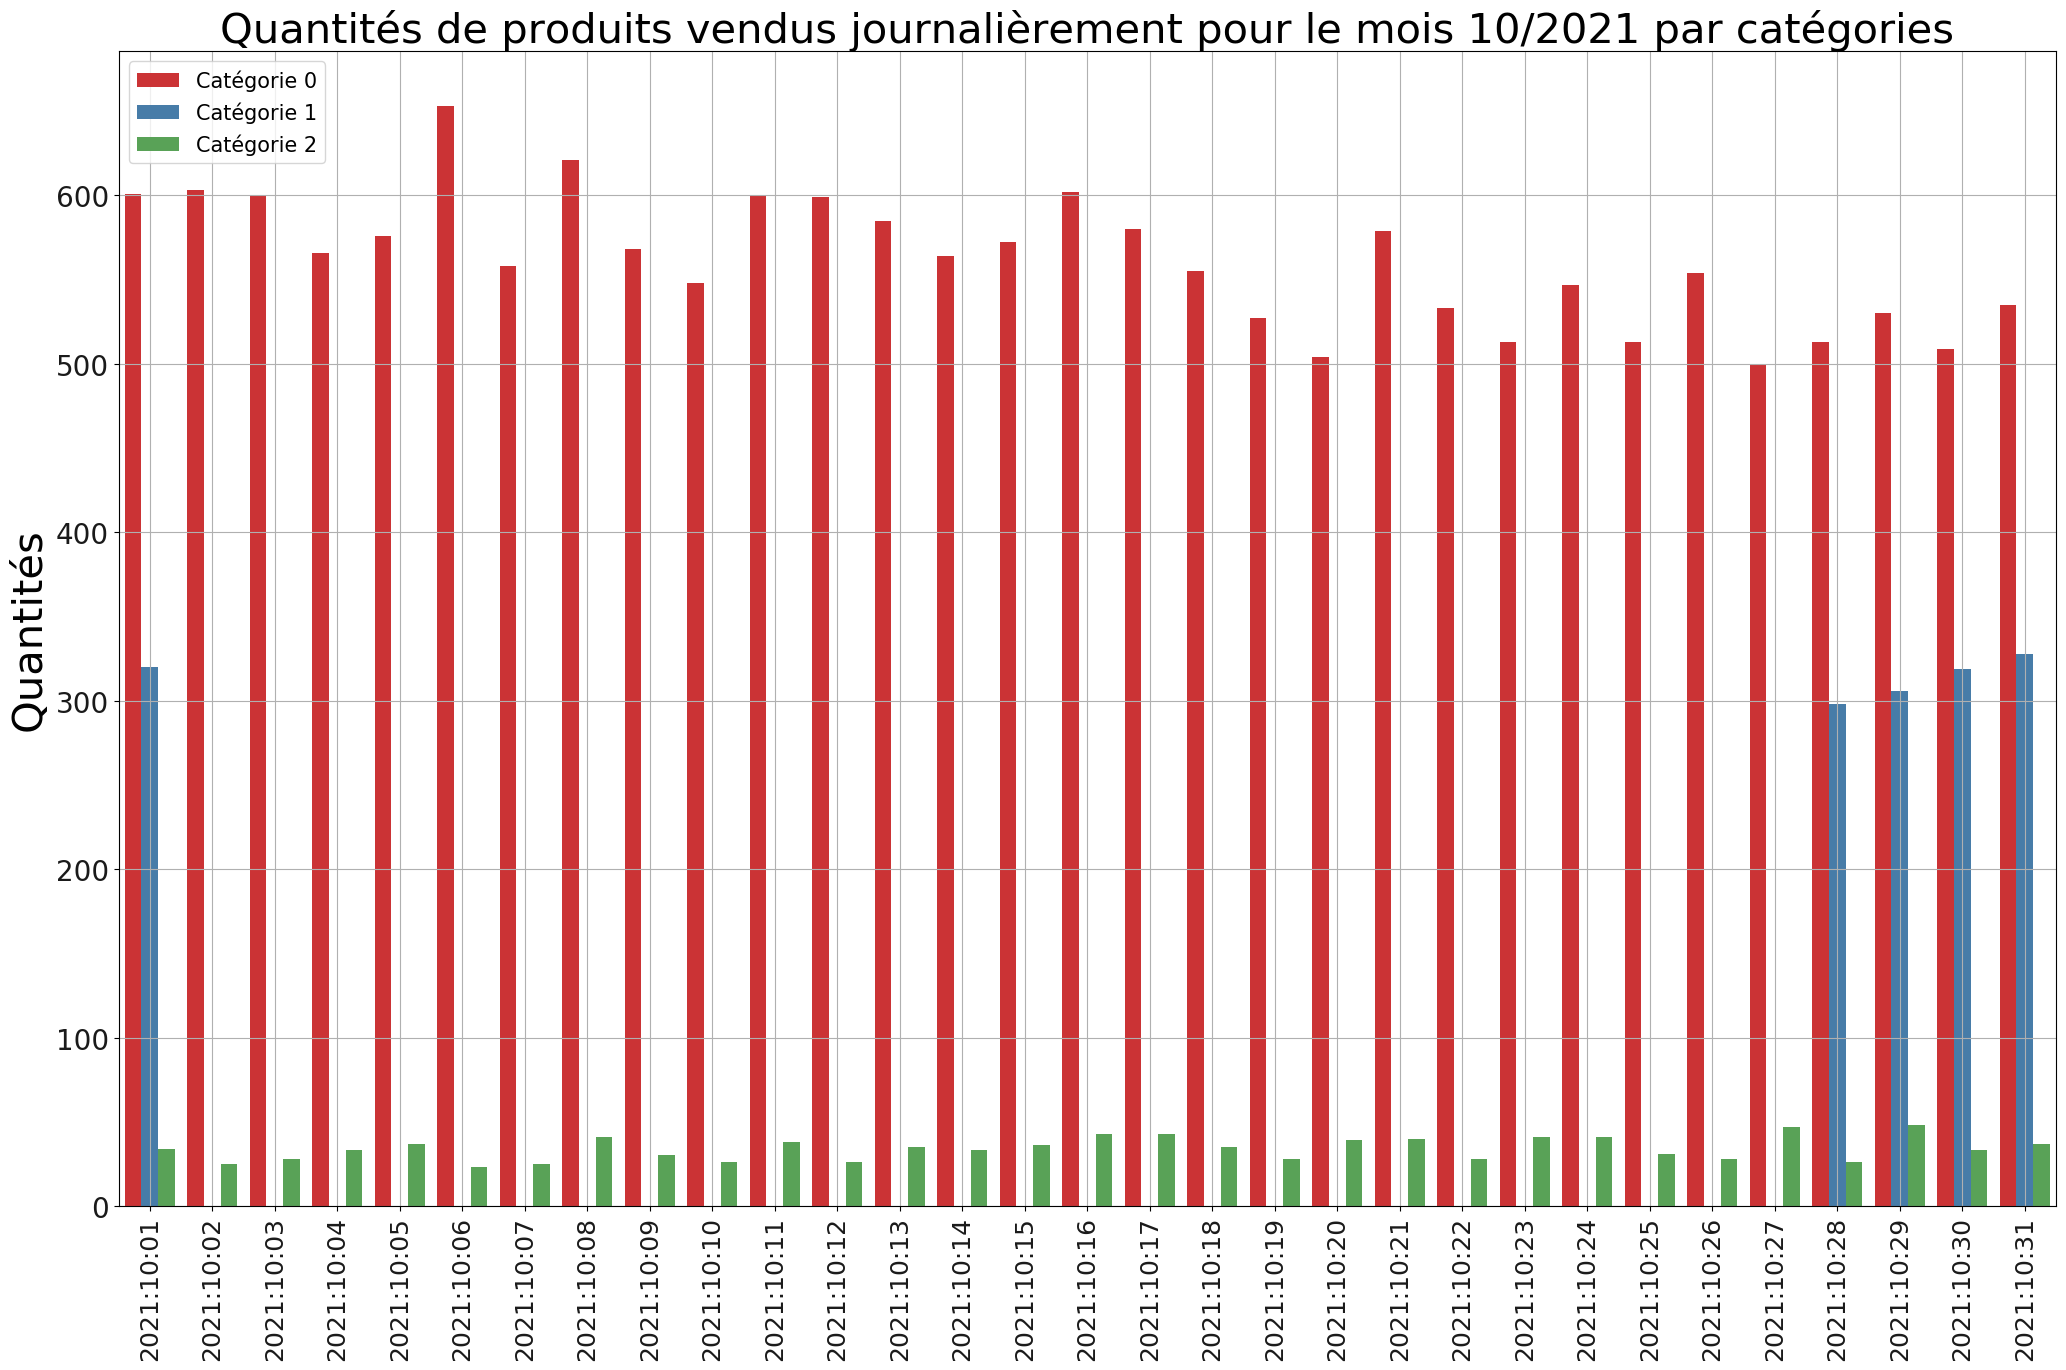

In [172]:
sns.reset_defaults()
jojo=data2[(data2["mois"] == "2021:10")].copy()
jojo.sort_values(by='fulldate', inplace=True)
plt.rcParams["figure.figsize"]=[25,15]
sns.countplot(x="jour",hue="categ",data=jojo,palette="Set1")
plt.title("Quantités de produits vendus journalièrement pour le mois 10/2021 par catégories", fontsize=30)
plt.xlabel(None)
plt.ylabel("Quantités",fontsize=30)
plt.xticks(fontsize = 18,color='k', rotation = 90)
plt.yticks(fontsize = 20,color='k')
plt.legend(loc=2,fontsize=15,labels=["Catégorie 0","Catégorie 1","Catégorie 2"])
plt.grid(True)
#plt.savefig("18.jpg",bbox="tight")
plt.show()

In [173]:
jojo = data2[(data2["mois"] == "2021:10") & (data2["categ"] == '1')].copy()
jojo.sort_values("fulldate", ascending = False, inplace=True)
jojo1 = jojo[(jojo["jour"] < "2021:10:15")]
jojo2 = jojo[(jojo["jour"] > "2021:10:15")]

In [174]:
print("Les produits de catégorie 1 ont cessés d'etre vendus à partir du", jojo1.fulldate.sort_values().iloc[-1] , "et leur vente a repris le" , jojo2.fulldate.sort_values().iloc[0] )

Les produits de catégorie 1 ont cessés d'etre vendus à partir du 2021-10-01 23:50:02.475137 et leur vente a repris le 2021-10-28 00:02:54.903656


In [175]:
toto = data2.groupby("client_id")["price"].sum().copy()
toto

client_id
c_1        300.65
c_10       586.18
c_100      222.87
c_1000     980.02
c_1001    1102.45
           ...   
c_995      119.08
c_996      739.60
c_997      572.89
c_998     1527.69
c_999      305.00
Name: price, Length: 8596, dtype: float64

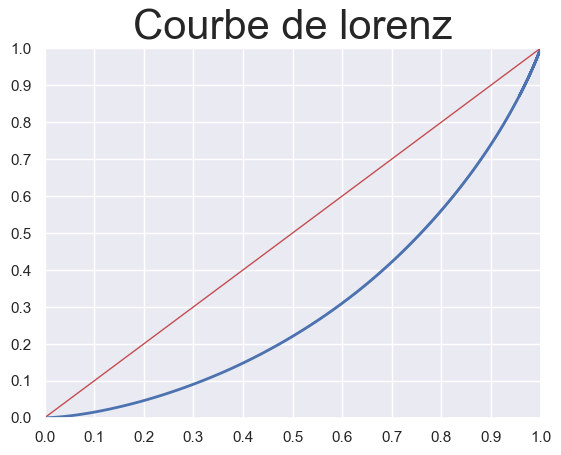

In [176]:
sns.reset_defaults()
sns.set()
lorenz = np.cumsum(np.sort(toto)) / toto.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
xaxis = np.linspace(0,1,len(lorenz))
plt.gca().set_xlim(0, 1)
plt.gca().set_ylim(0, 1)
plt.xticks( [0,0.1 ,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1])
plt.yticks([0,0.1 ,0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1])
plt.plot(xaxis,lorenz,drawstyle='steps-pre', lw=2)
plt.plot([0, 1], [0, 1], 'r-', lw=1) # Red straight line
plt.title("Courbe de lorenz", fontsize=30)
plt.gca().yaxis.set_ticks(range(0, 1), minor = True)
#plt.savefig("19.jpg",bbox="tight")
plt.show()

In [177]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/len(toto) # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini
#inegalite de pouvoir d achat des clients existante mais pas très forte car gini plus vers 0 que 1
#repartition des depenses clients;
#y=pourcentage cumulé des depenses  et x=pourcentage cumulé des clients
#lorenz pour detecter les outliers?
#on remarque cependant que 50% des depenses sont effectuees par 25% des client.

0.3950536504175791

In [178]:
#Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?

In [179]:
X = "sex"
Y = "categ"

temp = data2.sort_values(by='categ').copy()
temp = traitement(temp)

cont = temp[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")

cont

categ,0,1,2,Total
sex,,,,
f,101148,53774,8122,163044
m,94023,48851,7634,150508
Total,195171,102625,15756,313552


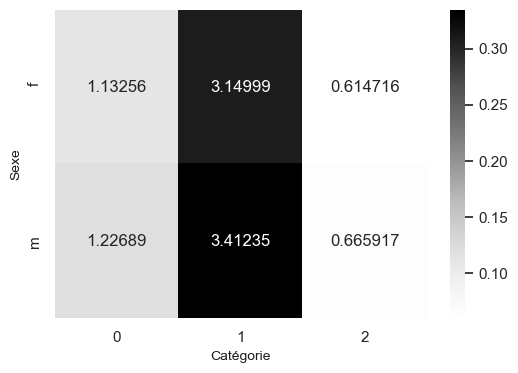

In [180]:
import seaborn as sns

plt.figure(figsize = (6,4))

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(temp)

indep = tx.dot(ty) / n #effectifs theoriques Tij :  s'il n y avait pas de lien entre les variables
#autant d homme que de femme: pas etonnant que les valeures theoriques et observees soient tres similaires,

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep ##tableau repartition ki2 
xi_n = measure.sum().sum() #ki2
table = measure/xi_n#%ki2 normalisé en %
sns.heatmap(table.iloc[:-1,:-1],annot=measure.iloc[:-1,:-1], cmap="Greys", cbar=True,fmt='g')
plt.xlabel("Catégorie",color="k",fontsize=10)
plt.ylabel("Sexe",color="k",fontsize=10)
#print(indep)
#plt.savefig("20.jpg",bbox="tight")
plt.show()

In [181]:
xi_n

10.202417277273174

In [182]:
measure

categ,0,1,2,Total
sex,,,,
f,1.132557,3.149986,0.614716,0.0
m,1.226889,3.412353,0.665917,0.0
Total,0.000000,0.000000,0.000000,0.0


In [183]:
#1-l'âge des clients et Le montant total des achats.(par client)

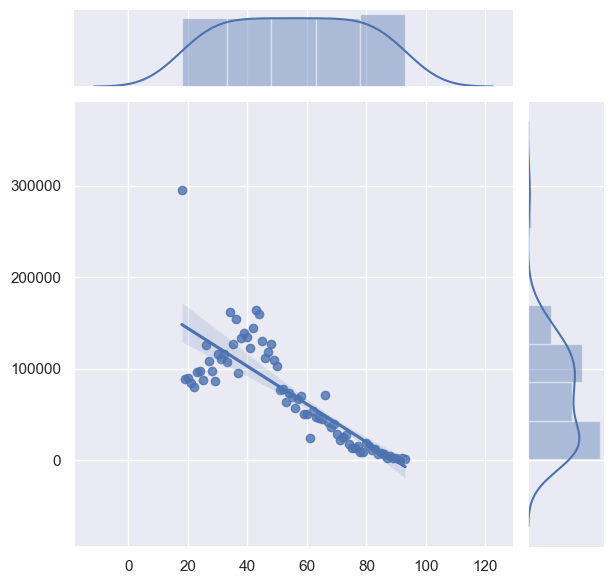

In [236]:
import numpy as np
sns.set()
#bins = np.arange(0, 100, 5)
plt.rcParams["figure.figsize"]=[10,5]
par_age = datas.groupby('age')
par_age.count()
achats_age=dict()
for age,group in par_age:
    achats_age[age]=int(sum(group['price']))
sns.jointplot(list(achats_age.keys()),list(achats_age.values()),data=datas, kind="reg" )
#courbe de regression simple
plt.draw()

In [184]:
#CREATION DF datacq SUR LEQUEL CHAQUE LIGNE REPRESENTE UN CLIENT, 
#ET LE TOTAL DE SES ACHATS AINSI QUE LE NOMBRE D ARTICLES ET DE SESSIONS

In [185]:
s_client=datas.drop(['age','sex','mois','jour','price'], axis=1).copy()
s_client=s_client['client_id'].value_counts()
s_client=s_client.to_frame()
s_client.reset_index(inplace=True)
s_client.rename(columns={"client_id":"s_qty"},inplace=True)
s_client.rename(columns={"index":"client_id"},inplace=True)
# s_qty nombre de session par client référencé
q_client=data2.drop(['id_prod','fulldate','session_id','jour','heure','mois','price','categ'], axis=1).copy()
q_client=q_client['client_id'].value_counts()
q_client=q_client.to_frame()
q_client.reset_index(inplace=True)
q_client.rename(columns={"client_id":"qty"},inplace=True)
q_client.rename(columns={"index":"client_id"},inplace=True)
# q_client quantité de produit acheté par client référencé
datacq = datac.copy()
datacq = pd.merge(datacq, q_client,on=["client_id"],how="outer")
datacq = pd.merge(datacq, s_client,on=["client_id"],how="outer")
print(datacq.isna().sum())
print (datacq.shape)
print (datac.shape)
datacq 

age          0
sex          0
client_id    0
price        0
qty          0
s_qty        0
dtype: int64
(8596, 6)
(8596, 4)


,age,sex,client_id,price,qty,s_qty
0,48,f,c_7959,2564.25,195,77
1,38,f,c_4491,2540.53,168,73
2,44,m,c_8026,2537.67,192,76
3,45,f,c_2140,2527.01,195,74
4,44,f,c_8392,2515.98,189,80
...,...,...,...,...,...,...
8591,54,f,c_8351,6.31,1,1
8592,20,f,c_890,6.08,1,1
8593,22,f,c_1675,5.57,1,1
8594,60,m,c_8114,4.99,1,1


<Figure size 600x400 with 0 Axes>

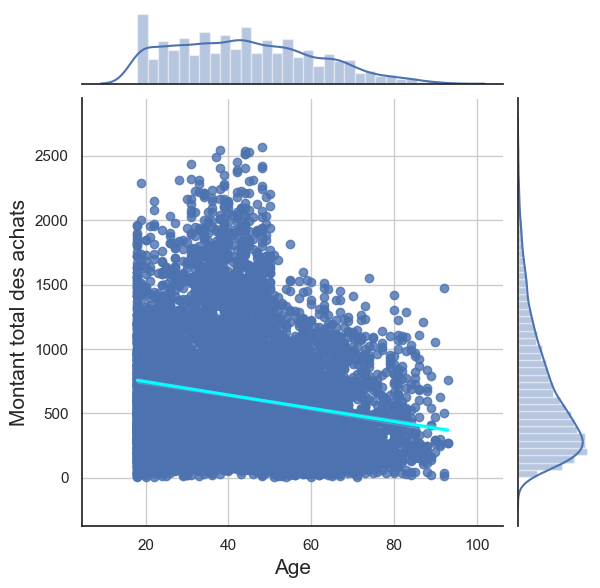

In [186]:
plt.figure(figsize = (6,4))
sns.set(style="white", color_codes=True)
sns.jointplot(datacq.age,datacq.price,data=datacq, kind="reg",
                  joint_kws={'line_kws':{'color':'cyan'}})
plt.xlabel("Age",fontsize=15)
plt.ylabel("Montant total des achats",fontsize=15)
plt.grid(True)
#plt.savefig("21.jpg",bbox="tight")
plt.show()

In [187]:
import scipy.stats as st
import numpy as np

print("Coefficient de détermination (R²): ",(st.pearsonr(datacq.age, datacq.price)[0])**2, "; les variables ne sont pas corrélées.")
#il n'y a pas de correlation entre l'age du client et le montant total de ses achats
#print("Coefficient de détermination (R²): ",(st.pearsonr(datacq.age, datacq.s_qty)[0])**2, "; les variables ne sont pas corrélées(independantes).")

Coefficient de détermination (R²):  0.03626098009139911 ; les variables ne sont pas corrélées.


In [188]:
datacq=_by4(datacq)
datacq

Ajout de 4 tranches d'ages


,age,sex,client_id,price,qty,s_qty,groupe_age
4527,18,m,c_8389,473.03,15,9,18 et -
6201,18,f,c_5353,298.58,14,8,18 et -
8586,18,m,c_4648,11.20,1,1,18 et -
4217,18,f,c_1692,511.52,22,6,18 et -
7956,18,f,c_3606,126.32,6,2,18 et -
...,...,...,...,...,...,...,...
4982,60,m,c_7379,421.57,24,12,51 et +
4986,56,f,c_4863,421.33,29,21,51 et +
4994,56,f,c_7869,420.59,23,21,51 et +
4871,61,m,c_5174,434.28,32,24,51 et +


In [189]:
X = "groupe_age" # qualitative
Y = "price" # quantitative
sous_echantillon = datacq.sort_values(by='groupe_age').copy()

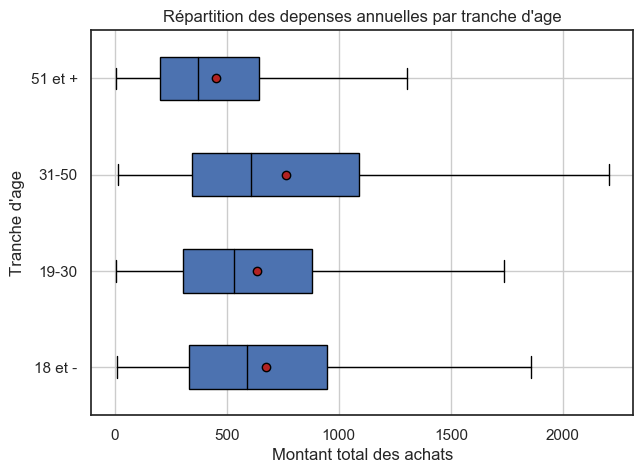

In [190]:
plt.rcParams["figure.figsize"]=[7,5]
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("Montant total des achats")
plt.ylabel("Tranche d'age")
plt.title("Répartition des depenses annuelles par tranche d'age")
plt.grid(True)
#plt.savefig("21a.jpg",bbox="tight")
plt.show()

In [191]:
#X = "groupe_age" # qualitative
#Y = "qty" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print("L'éta-carré (η2) est de ",eta_squared(sous_echantillon[X],sous_echantillon[Y]))#Les variables ne sont pas corrélées

L'éta-carré (η2) est de  0.08564653779489881


In [192]:
infos_ga(datacq)

le panier minimum est à  4.15  €.
le panier maximum est à  2564.25  €.
achat moyenne:  623.86
achat médian  501.17
Mode:
 0    251.74
dtype: float64
Variance:
 208849.7308140045
Ecart-type:
 457.00079957698597
--------------------
Pour les  51 et + .
2965 clients.
achat moyenne:  452.28
achat médian  369.91
Mode:  74.95
Variance:  102367.97
Ecart-type:  319.95
Minimum:  4.15  €.
Maximum:  1815.14  €.
--------------------
Pour les  19-30 .
1829 clients.
achat moyenne:  633.64
achat médian  533.2
Mode:  118.98
Variance:  179062.19
Ecart-type:  423.16
Minimum:  5.57  €.
Maximum:  2313.54  €.
--------------------
Pour les  18 et - .
437 clients.
achat moyenne:  675.95
achat médian  591.58
Mode:  8.82
Variance:  195784.87
Ecart-type:  442.48
Minimum:  8.82  €.
Maximum:  1964.0  €.
--------------------
Pour les  31-50 .
3365 clients.
achat moyenne:  762.96
achat médian  607.77
Mode:  131.1
Variance:  274867.66
Ecart-type:  524.28
Minimum:  15.72  €.
Maximum:  2564.25  €.


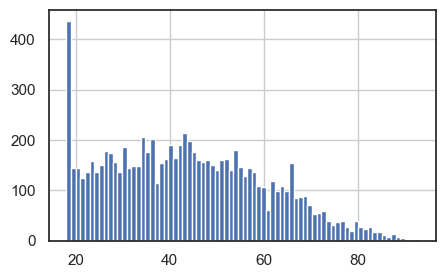

In [193]:
plt.rcParams["figure.figsize"]=[5,3]
datacq['age'].hist(density=False,bins=76)

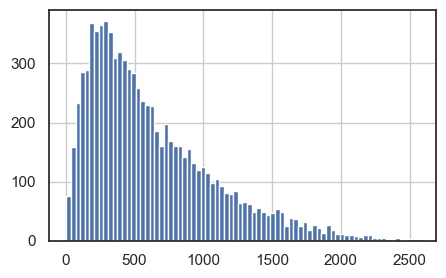

In [194]:
plt.rcParams["figure.figsize"]=[5,3]
datacq['price'].hist(density=False,bins=76)

In [195]:
#2-l'âge des clients et La fréquence d’achat (ie. nombre d'achats par mois par exemple)...ici annuel
#-datacq SUR LEQUEL CHAQUE LIGNE REPRESENTE UN CLIENT ET LE TOTAL DE SES ACHATS AINSI QUE LE NOMBRE D ARTICLES ET DE SESSIONS

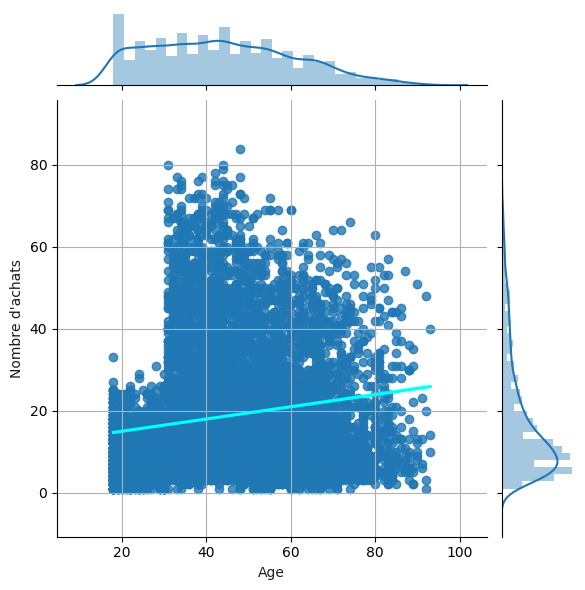

In [196]:
sns.reset_defaults()
sns.jointplot(datacq.age,datacq.s_qty,data=datacq, kind="reg",
                  joint_kws={'line_kws':{'color':'cyan'}} )
plt.xlabel("Age",color="k",fontsize=10)
plt.ylabel("Nombre d'achats",color="k",fontsize=10)
plt.grid(True)
#plt.savefig("22.jpg",bbox="tight")
plt.show()

In [197]:
print("Coefficient de détermination (R²): ",st.pearsonr(datacq.age, datacq.s_qty)[0]**2, "; les variables ne sont pas corrélées(independantes).")
#pas de correlation entre l'age et le nombre d'achat

Coefficient de détermination (R²):  0.02709353568213066 ; les variables ne sont pas corrélées(independantes).


In [198]:
X = "groupe_age" # qualitative
Y = "s_qty" # quantitative
sous_echantillon = datacq.sort_values(by='groupe_age').copy()

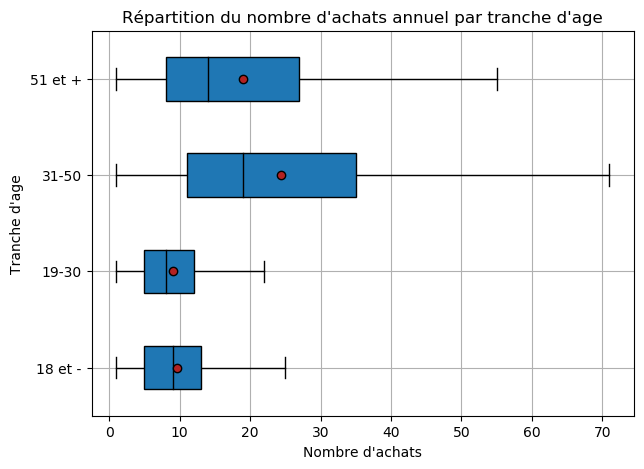

In [199]:
plt.rcParams["figure.figsize"]=[7,5]
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("Nombre d'achats")
plt.ylabel("Tranche d'age")
plt.title("Répartition du nombre d'achats annuel par tranche d'age")
plt.grid(True)
#plt.savefig("22a.jpg",bbox="tight")
plt.show()

In [200]:
#X = "groupe_age" # qualitative
#Y = "qty" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print("L'éta-carré (η2) est de ",eta_squared(sous_echantillon[X],sous_echantillon[Y]))#Les variables ne sont pas corrélées

L'éta-carré (η2) est de  0.15635006629560244


In [201]:
infos_ga2(datacq)

le nombre d'achats' minimum est de  1
le nombre d'achats' maximum est de  84
nb achats moyenne:  18.53
nb achats médian:  13.0
Mode:
 0    6
dtype: int64
Variance:
 235.12423250687843
Ecart-type:
 15.333761198964801
--------------------
Achats pour les  51 et + .
2965 clients.
nb achats moyenne:  18.95
nb achats médian  14.0
Mode:  6
Variance:  209.42
Ecart-type:  14.47
Minimum:  1
Maximum:  72
--------------------
Achats pour les  19-30 .
1829 clients.
nb achats moyenne:  9.07
nb achats médian  8.0
Mode:  5
Variance:  30.19
Ecart-type:  5.49
Minimum:  1
Maximum:  31
--------------------
Achats pour les  18 et - .
437 clients.
nb achats moyenne:  9.68
nb achats médian  9.0
Mode:  5
Variance:  32.24
Ecart-type:  5.68
Minimum:  1
Maximum:  33
--------------------
Achats pour les  31-50 .
3365 clients.
nb achats moyenne:  24.45
nb achats médian  19.0
Mode:  11
Variance:  301.6
Ecart-type:  17.37
Minimum:  1
Maximum:  84


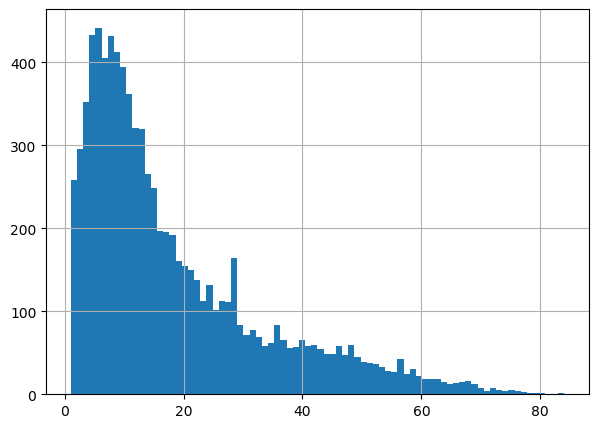

In [202]:
plt.rcParams["figure.figsize"]=[7,5]
datacq['s_qty'].hist(density=False,bins=80)

In [203]:
#3-l'âge des clients et La taille du panier moyen (en nombre d’articles).

In [204]:
#CREATION DF data2_b SUR LEQUEL CHAQUE LIGNE REPRESENTE UNE TRANSACTION ET LE NOMBRE D'ARTICLES DANS LE PANIER
q_session = data2.groupby("session_id").size()
q_session = q_session.sort_values().to_frame()
q_session.sort_values(by='session_id')
data2_b = datas.copy()
data2_b = pd.merge(data2_b, q_session,on=["session_id"],how="outer")
data2_b = data2_b.rename(columns={0:"qty"})
print(data2_b.isna().sum())
print (data2_b.shape)
data2_b.head(10)

age          0
sex          0
mois         0
jour         0
client_id    0
price        0
qty          0
dtype: int64
(159273, 7)


,age,sex,mois,jour,client_id,price,qty
session_id,,,,,,,
s_123227,29,f,2021:11,2021:11:22,c_8345,539.23,3
s_83158,18,f,2021:08,2021:08:31,c_3241,535.17,3
s_150439,29,m,2022:01,2022:01:16,c_667,496.22,4
s_170478,24,m,2022:02,2022:02:25,c_4658,476.19,5
s_69450,25,m,2021:07,2021:07:31,c_469,452.45,4
s_45051,24,m,2021:06,2021:06:06,c_2545,450.09,5
s_166799,23,m,2022:02,2022:02:17,c_5155,447.35,3
s_81243,25,f,2021:08,2021:08:27,c_6761,444.20,3
s_53692,18,m,2021:06,2021:06:25,c_2791,420.98,4


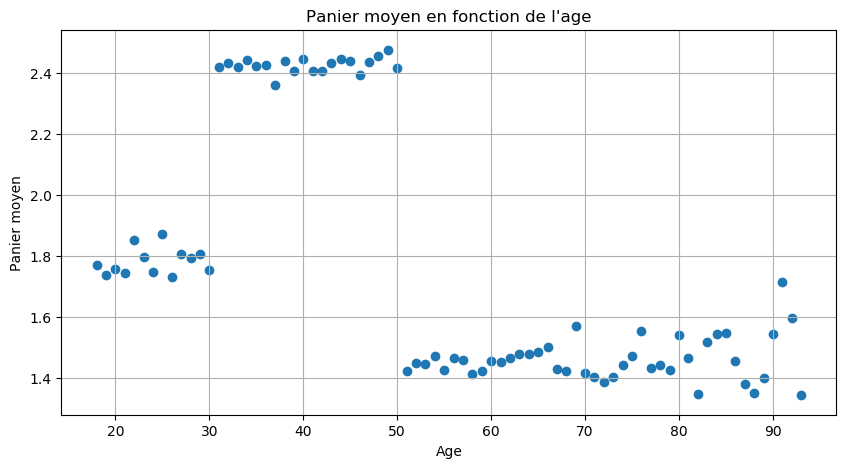

In [205]:
par_age = data2_b.groupby('age')
achats_age=dict()
for age,group in par_age:
    achats_age[age]=group['qty'].mean()
plt.rcParams["figure.figsize"]=[10,5]
plt.scatter(list(achats_age.keys()),list(achats_age.values()),cmap="seismic")
plt.xlabel("Age")
plt.ylabel("Panier moyen")
plt.title("Panier moyen en fonction de l'age")
plt.grid(True)
#plt.savefig("23.jpg",bbox="tight")
plt.show()

In [206]:
#création du df pamc contenant client_id / panier moyen/sex /age/tranche d'age
pamc = data2_b.groupby('client_id')['qty'].mean().copy()
pamc=pamc.to_frame()
pamc=pamc.reset_index()
customers = pd.read_csv("customers.csv")
customers['age'] = ((2022-customers['birth'])).astype(int) #supposons que nous sommes en 2022, derniere annee transactions
del customers['birth']
pamc = pd.merge(pamc, customers, on=["client_id"],how="inner")
pamc=_by4(pamc)
pamc

Ajout de 4 tranches d'ages


,client_id,qty,sex,age,groupe_age
1841,c_2658,3.666667,m,18,18 et -
2645,c_3383,2.000000,f,18,18 et -
7692,c_7941,2.000000,m,18,18 et -
4445,c_5010,1.250000,f,18,18 et -
742,c_1669,1.600000,m,18,18 et -
...,...,...,...,...,...
4271,c_4854,1.310345,m,54,51 et +
4270,c_4853,1.482759,m,69,51 et +
4267,c_4850,1.045455,m,73,51 et +
4281,c_4863,1.380952,f,56,51 et +


In [207]:
import scipy.stats as st
import numpy as np

print("Coefficient de détermination (R²): ",(st.pearsonr(pamc.age, pamc.qty)[0])**2, "; les variables ne sont pas corrélées, cependant on remarque que l on peu diviser la clientele en 4 tranches d'ages comme nous l'avons déja remarqué.")
#il n'y a pas de correlation entre l'age du client et le montant total de ses achats
#print("Coefficient de détermination (R²): ",(st.pearsonr(datacq.age, datacq.s_qty)[0])**2, "; les variables ne sont pas corrélées(independantes)")

Coefficient de détermination (R²):  0.051689138008137916 ; les variables ne sont pas corrélées, cependant on remarque que l on peu diviser la clientele en 4 tranches d'ages comme nous l'avons déja remarqué.


In [208]:
X = "groupe_age" # qualitative
Y = "qty" # quantitative
sous_echantillon = pamc.sort_values(by='groupe_age').copy()

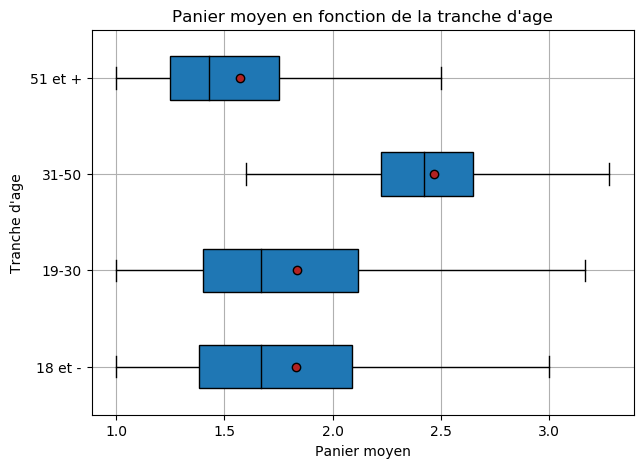

In [209]:
plt.rcParams["figure.figsize"]=[7,5]
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("Panier moyen")
plt.ylabel("Tranche d'age")
plt.title("Panier moyen en fonction de la tranche d'age")
plt.grid(True)
#plt.savefig("24.jpg",bbox="tight")
plt.show()

In [210]:
X = "groupe_age" # qualitative
Y = "qty" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print("L'éta-carré (η2) est de ",eta_squared(sous_echantillon[X],sous_echantillon[Y]))#Les variables ne sont pas corrélées

L'éta-carré (η2) est de  0.37014990886538435


In [211]:
infos_ga3(pamc)

Minimum d'articles par achat  1.0
Maximum d'articles par achat  7.0
nb articles moyenne:  1.99
nb articles médiane:  2.0
Mode:
 0    2.0
dtype: float64
Variance:
 0.4212495303513884
Ecart-type:
 0.6490373874834857
--------------------
Qté par panier pour les  19-30 .
1829 clients.
qté moyenne:  1.84
qté médiane  1.67
Mode:  2.0
Variance:  0.44
Ecart-type:  0.66
Qté minimum:  1.0
Qté maximum:  5.5
--------------------
Qté par panier pour les  51 et + .
2965 clients.
qté moyenne:  1.57
qté médiane  1.43
Mode:  1.0
Variance:  0.25
Ecart-type:  0.5
Qté minimum:  1.0
Qté maximum:  5.0
--------------------
Qté par panier pour les  18 et - .
437 clients.
qté moyenne:  1.83
qté médiane  1.67
Mode:  2.0
Variance:  0.43
Ecart-type:  0.66
Qté minimum:  1.0
Qté maximum:  7.0
--------------------
Qté par panier pour les  31-50 .
3365 clients.
qté moyenne:  2.47
qté médiane  2.42
Mode:  2.0
Variance:  0.16
Ecart-type:  0.4
Qté minimum:  1.0
Qté maximum:  6.0


In [212]:
data2_b

,age,sex,mois,jour,client_id,price,qty
session_id,,,,,,,
s_123227,29,f,2021:11,2021:11:22,c_8345,539.23,3
s_83158,18,f,2021:08,2021:08:31,c_3241,535.17,3
s_150439,29,m,2022:01,2022:01:16,c_667,496.22,4
s_170478,24,m,2022:02,2022:02:25,c_4658,476.19,5
s_69450,25,m,2021:07,2021:07:31,c_469,452.45,4
...,...,...,...,...,...,...,...
s_83637,57,m,2021:09,2021:09:01,c_5969,0.66,1
s_104606,38,m,2021:10,2021:10:14,c_4951,0.62,1
s_34456,81,f,2021:05,2021:05:14,c_5510,0.62,1


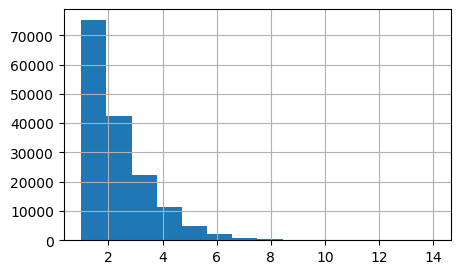

In [213]:
plt.rcParams["figure.figsize"]=[5,3]
data2_b['qty'].hist(density=False,bins=14)

In [214]:
data2_b=_by4(data2_b) #on rajoute la colonne groupe age

X = "groupe_age"
Y = "qty"
data2_b["qty"]=data2_b["qty"].astype(int)
#panier_m["qty"]=panier_m["qty"].astype(str)
data2_b.sort_values(by='qty',ascending=True,inplace=True)

cont = data2_b[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

Ajout de 4 tranches d'ages


qty,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Total
groupe_age,,,,,,,,,,,,,,,
18 et -,2490.0,998.0,359.0,169.0,108.0,63.0,29.0,9.0,5.0,NaN,1.0,NaN,NaN,NaN,4231
19-30,9761.0,3923.0,1325.0,738.0,417.0,230.0,126.0,42.0,25.0,6.0,3.0,NaN,NaN,1.0,16597
31-50,21763.0,27320.0,18317.0,9150.0,3599.0,1379.0,489.0,165.0,54.0,13.0,6.0,2.0,1.0,NaN,82258
51 et +,41125.0,10052.0,2393.0,1139.0,752.0,392.0,198.0,83.0,31.0,17.0,4.0,NaN,1.0,NaN,56187
Total,75139.0,42293.0,22394.0,11196.0,4876.0,2064.0,842.0,299.0,115.0,36.0,14.0,2.0,2.0,1.0,159273


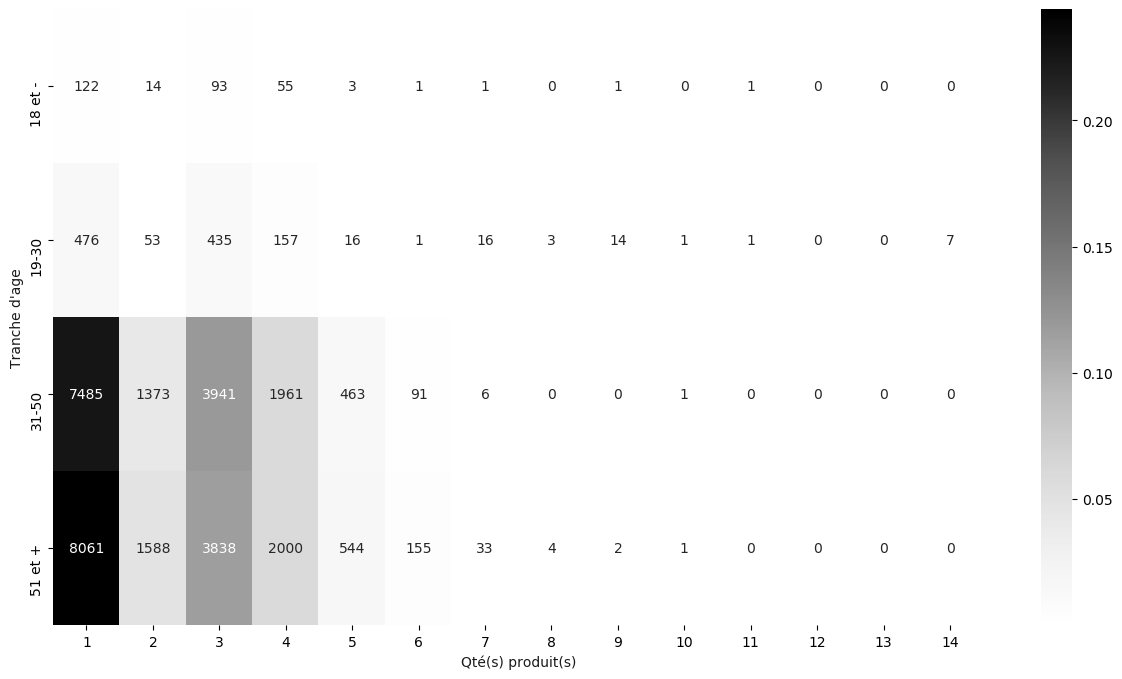

In [215]:
import seaborn as sns
plt.figure(figsize = (15,8))
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data2_b)
indep = tx.dot(ty) / n #effectifs theoriques Tij :  s'il n y avait pas de lien entre les variables

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = ((c-indep)**2)/indep # ((effectifs-effectifs theoriques)²/effectifs theoriques) 
##############################ou somme des carres des ecrats relativisés soit ki2(tableau) xi_ij
xi_n = measure.sum().sum()#ki2
table = measure/xi_n #tableau contributiobns apres normalistation en divisant par xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=(measure).astype(int).iloc[:-1,:-1], cmap="Greys", cbar=True,fmt='g')
plt.xlabel("Qté(s) produit(s)",color="k",fontsize=10)
plt.ylabel("Tranche d'age",color="k",fontsize=10)
#plt.savefig("25.jpg",bbox="tight")
plt.show()


#measure = ((c-indep)**2)/indep
#table = measure/xi_n
#xi_n = measure.sum().sum()#xi_n

###table2 = (((c-indep)**2)/indep)/((((c-indep)**2)/indep).sum().sum())#tableau ki2 divisse par le ki2 total = pourcentage
#l'ecart imprtant entre les effectifs observés et theorique laisse penser qu il existe un lien entre les variables

In [216]:
xi_n

33041.44351490019

In [217]:
print("Coefficient de détermination (R²): ",(st.pearsonr(data2_b.age, data2_b.qty)[0])**2, "; les variables ne sont pas corrélées(independantes).")
#pas de correlation entre l'age et le nombre d'articles dans le panier

Coefficient de détermination (R²):  0.0375475598206429 ; les variables ne sont pas corrélées(independantes).


In [218]:
#4-l'âge des clients et Les catégories de produits achetés.

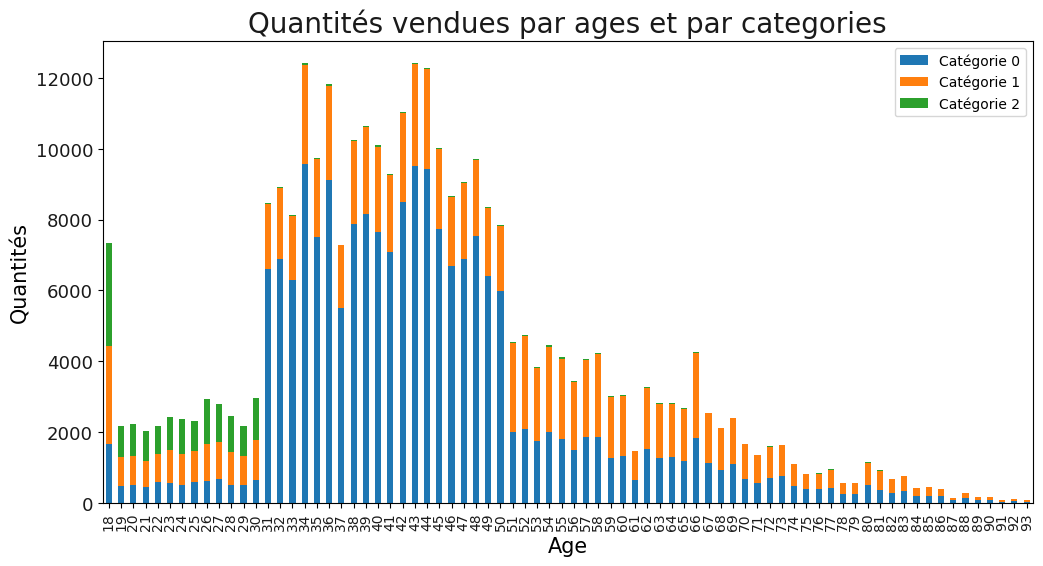

In [219]:
sns.reset_defaults()
catega=data2.copy()
catega=traitement(catega)
plt.rcParams["figure.figsize"]=[12,6]
df_plot = catega.groupby(['age', 'categ']).size().reset_index().pivot(columns='categ', index='age', values=0)
df_plot.plot(kind='bar', stacked=True)
plt.title("Quantités vendues par ages et par categories",color='k',fontsize = 20)
plt.xlabel("Age",fontsize = 15)
plt.ylabel("Quantités",fontsize = 15)
plt.xticks(fontsize = 10,color='k', rotation = 90)
plt.yticks(fontsize = 13,color='k')
plt.legend(labels=["Catégorie 0","Catégorie 1","Catégorie 2"])
plt.grid(False)
#plt.savefig("26.jpg",bbox="tight")
plt.show()
#on remarque 4 tranches d'ages 18 / 19-30 / 31-50 / 51-93

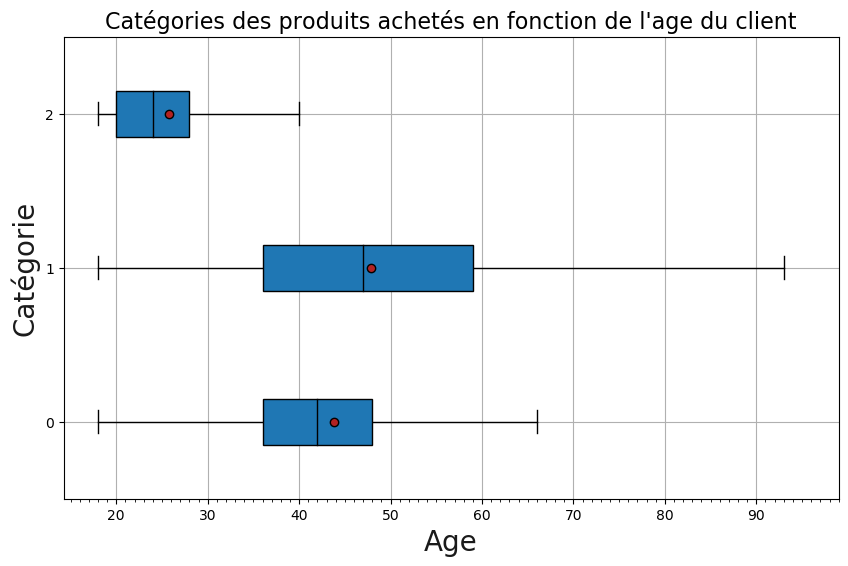

In [220]:
plt.rcParams["figure.figsize"]=[10,6]
X = "categ" # qualitative
Y = "age" # quantitative
sous_echantillon = data2.sort_values(by='categ').copy()
sous_echantillon = traitement(sous_echantillon)
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])
 
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.title("Catégories des produits achetés en fonction de l'age du client", fontsize=16)
plt.xlabel("Age",color="k",fontsize=20)
plt.ylabel("Catégorie",color="k",fontsize=20)
plt.gca().xaxis.set_ticks(range(15, 100, 1), minor = True)
plt.grid(True)
#plt.savefig("27.jpg",bbox="tight")
plt.show()

In [221]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print("L'éta-carré (η2) est de ",eta_squared(sous_echantillon[X],sous_echantillon[Y]))

L'éta-carré (η2) est de  0.11281696159848578


In [222]:
infos_ga4(data2)

Age minimum  18
Age maximum  93
age moyen:  44.21
age médian:  43.0
Mode:
 0    43
dtype: int32
Variance:
 190.37265265974995
Ecart-type:
 13.79755966320675
--------------------
Pour la catégorie  2 .
15756 achats.
age moyen:  25.75
age médian:  24.0
Mode:  18
Variance:  92.78
Ecart-type:  9.63
age minimum:  18
age maximum:  92
--------------------
Pour la catégorie  0 .
195171 achats.
age moyen:  43.8
age médian:  42.0
Mode:  34
Variance:  132.54
Ecart-type:  11.51
age minimum:  18
age maximum:  93
--------------------
Pour la catégorie  1 .
102625 achats.
age moyen:  47.81
age médian:  47.0
Mode:  43
Variance:  249.72
Ecart-type:  15.8
age minimum:  18
age maximum:  93


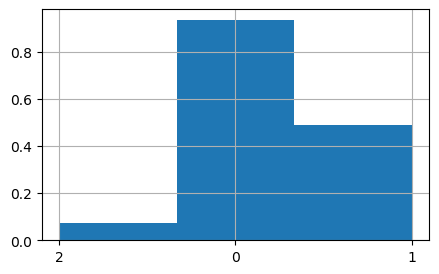

In [223]:
plt.rcParams["figure.figsize"]=[5,3]
data2['categ'].hist(density=True,bins=3)

In [224]:
#ajout d'une colonne tranche d'age a data2
data2=_by4(data2)
data2

Ajout de 4 tranches d'ages


,id_prod,fulldate,session_id,client_id,jour,heure,mois,price,categ,sex,age,groupe_age
219647,2_1,2021-08-26 09:11:33.532575,s_80874,c_6158,2021:08:26,09:11,2021:08,56.99,2,m,18,18 et -
333188,2_184,2021-08-22 22:56:16.760302,s_79362,c_6630,2021:08:22,22:56,2021:08,49.61,2,f,18,18 et -
333187,1_413,2021-04-05 20:12:12.553494,s_16483,c_6630,2021:04:05,20:12,2021:04,17.99,1,f,18,18 et -
333186,1_343,2021-04-05 20:02:37.952151,s_16483,c_6630,2021:04:05,20:02,2021:04,27.99,1,f,18,18 et -
310109,2_225,2021-10-01 13:04:32.787243,s_98428,c_6843,2021:10:01,13:04,2021:10,157.99,2,f,18,18 et -
...,...,...,...,...,...,...,...,...,...,...,...,...
252052,1_493,2021-09-30 20:14:38.827943,s_98083,c_2011,2021:09:30,20:14,2021:09,10.99,1,m,57,51 et +
252051,1_493,2021-06-04 07:49:57.691686,s_43852,c_2011,2021:06:04,07:49,2021:06,10.99,1,m,57,51 et +
252050,0_1451,2021-05-14 12:34:34.378543,s_34400,c_2011,2021:05:14,12:34,2021:05,19.99,0,m,57,51 et +
45443,0_1483,2021-06-10 08:55:06.386905,s_46651,c_5156,2021:06:10,08:55,2021:06,4.99,0,f,57,51 et +


In [225]:
X = "categ"
Y = "groupe_age"

data2.sort_values(by='categ',ascending=True,inplace=True)

cont = data2[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

groupe_age,18 et -,19-30,31-50,51 et +,Total
categ,,,,,
0,1668,6678,150893,35932,195171
1,2759,10773,44877,44216,102625
2,2921,11566,574,695,15756
Total,7348,29017,196344,80843,313552


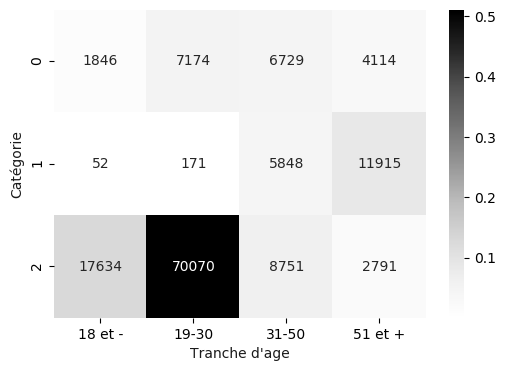

In [226]:
import seaborn as sns
plt.figure(figsize = (6,4))
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data2)
indep = tx.dot(ty) / n #effectifs theoriques Tij :  s'il n y avait pas de lien entre les variables

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = ((c-indep)**2)/indep # ((effectifs-effectifs theoriques)²/effectifs theoriques) 
##############################ou somme des carres des ecrats relativisés soit  xi_ij
xi_n = measure.sum().sum()
table = measure/xi_n #tableau contributiobns apres normalistation en divisant par le ki2
sns.heatmap(table.iloc[:-1,:-1],annot=(measure).astype(int).iloc[:-1,:-1], cmap="Greys", cbar=True,fmt='g')
plt.xlabel("Tranche d'age",color="k",fontsize=10)
plt.ylabel("Catégorie",color="k",fontsize=10)
#print(measure)#xi_ij
#plt.savefig("28.jpg",bbox="tight")
plt.show()

#measure = ((c-indep)**2)/indep
#table = measure/xi_n
#xi_n = measure.sum().sum()

###table2 = (((c-indep)**2)/indep)/((((c-indep)**2)/indep).sum().sum())#tableau ki2 divisse par le ki2 total = pourcentage
#l'ecart imprtant entre les effectifs observés et theorique laisse penser qu il existe un lien entre les variables

In [227]:
xi_n

137099.95489648925

In [228]:
#Pourcentage du chiffre d'affaires par tranche d'age##

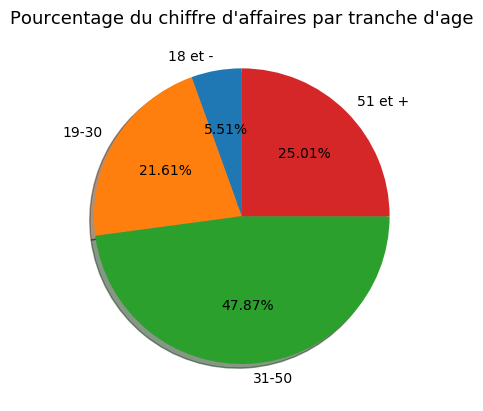

In [229]:
plt.style.use('default')
toto = data2.groupby("groupe_age")["price"].sum().copy()
plt.title("Pourcentage du chiffre d'affaires par tranche d'age", fontsize=13)
plt.rcParams["figure.figsize"]=[5,5]
plt.pie(toto.values, autopct='%1.2f%%',shadow=True,startangle=90,labels=["18 et -","19-30","31-50","51 et +"], textprops={'fontsize': 10})
#plt.savefig("10c.jpg",bbox="tight")
plt.show()

In [230]:
#Pourcentage du chiffre d'affaires par sexe##

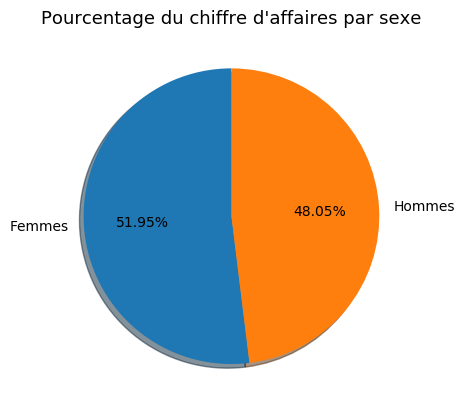

In [231]:
plt.style.use('default')
toto = data2.groupby("sex")["price"].sum().copy()
plt.title("Pourcentage du chiffre d'affaires par sexe", fontsize=13)
plt.rcParams["figure.figsize"]=[5,5]
plt.pie(toto.values, autopct='%1.2f%%',shadow=True,startangle=90,labels=["Femmes","Hommes"], textprops={'fontsize': 10})
#plt.savefig("10d.jpg",bbox="tight")
plt.show()

In [232]:
#Pourcentage des clients par tranche d'age##

Ajout de 4 tranches d'ages


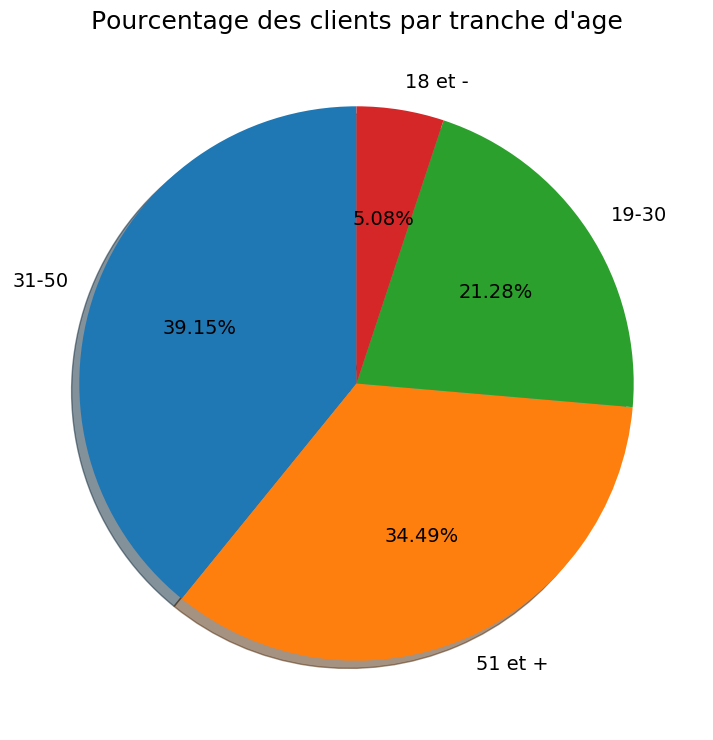

In [233]:
datacq=_by4(datacq)
momo=datacq["groupe_age"].value_counts()
plt.rcParams["figure.figsize"]=[9,9]
plt.pie(momo.values,labels=["31-50","51 et +","19-30","18 et -"],autopct='%1.2f%%',shadow=True,startangle=90 , textprops={'fontsize': 14})
plt.title("Pourcentage des clients par tranche d'age",fontsize=18)
#plt.savefig("10e.jpg",bbox="tight")
plt.show()

In [136]:
#Pourcentage des paniers par tranche d'age##
#Tableau de contingeance % des ventes et qté dans le panier en fonction de la couleur, ##

In [137]:
data2_b=_by4(data2_b) #on rajoute la colonne groupe age

X = "groupe_age"
Y = "qty"
data2_b["qty"]=data2_b["qty"].astype(int)
#panier_m["qty"]=panier_m["qty"].astype(str)
data2_b.sort_values(by='qty',ascending=True,inplace=True)

cont = data2_b[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

Ajout de 4 tranches d'ages


qty,1,2,3,4,5,6,7,8,9,10,11,12,13,14,Total
groupe_age,,,,,,,,,,,,,,,
18 et -,2490.0,998.0,359.0,169.0,108.0,63.0,29.0,9.0,5.0,NaN,1.0,NaN,NaN,NaN,4231
19-30,9761.0,3923.0,1325.0,738.0,417.0,230.0,126.0,42.0,25.0,6.0,3.0,NaN,NaN,1.0,16597
31-50,21763.0,27320.0,18317.0,9150.0,3599.0,1379.0,489.0,165.0,54.0,13.0,6.0,2.0,1.0,NaN,82258
51 et +,41125.0,10052.0,2393.0,1139.0,752.0,392.0,198.0,83.0,31.0,17.0,4.0,NaN,1.0,NaN,56187
Total,75139.0,42293.0,22394.0,11196.0,4876.0,2064.0,842.0,299.0,115.0,36.0,14.0,2.0,2.0,1.0,159273


qty                1         2         3         4         5         6  \
groupe_age                                                               
18 et -     0.015634  0.006266  0.002254  0.001061  0.000678  0.000396   
19-30       0.061285  0.024631  0.008319  0.004634  0.002618  0.001444   
31-50       0.136640  0.171529  0.115004  0.057449  0.022596  0.008658   
51 et +     0.258204  0.063112  0.015025  0.007151  0.004721  0.002461   
Total       0.471762  0.265538  0.140601  0.070294  0.030614  0.012959   

qty                7         8         9        10        11        12  \
groupe_age                                                               
18 et -     0.000182  0.000057  0.000031  0.000000  0.000006  0.000000   
19-30       0.000791  0.000264  0.000157  0.000038  0.000019  0.000000   
31-50       0.003070  0.001036  0.000339  0.000082  0.000038  0.000013   
51 et +     0.001243  0.000521  0.000195  0.000107  0.000025  0.000000   
Total       0.005287  0.001877  0.000

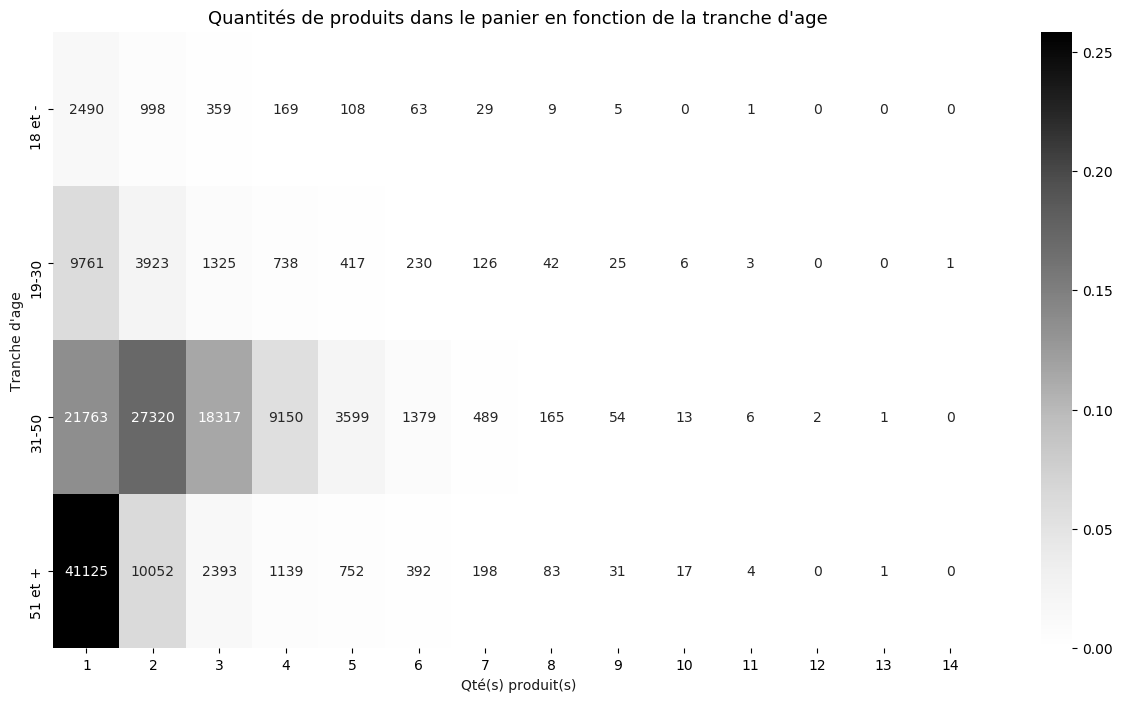

In [138]:
import seaborn as sns
plt.figure(figsize = (15,8))
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data2_b)

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = c/n
sns.heatmap(measure.iloc[:-1,:-1],annot=c.iloc[:-1,:-1], cmap="Greys", cbar=True,fmt='g')
plt.title("Quantités de produits dans le panier en fonction de la tranche d'age", fontsize=13)
plt.xlabel("Qté(s) produit(s)",color="k",fontsize=10)
plt.ylabel("Tranche d'age",color="k",fontsize=10)
print(measure)
#plt.savefig("29.jpg",bbox="tight")
plt.show()

In [139]:
#Quantités de produits achetés en fonction de la tranche d'age et de la catégorie##
#Tableau de contingeance % des ventes par categorie et tranche d age, ##

In [140]:
X = "categ"
Y = "groupe_age"

data2.sort_values(by='categ',ascending=True,inplace=True)

cont = data2[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

groupe_age,18 et -,19-30,31-50,51 et +,Total
categ,,,,,
0,1668,6678,150893,35932,195171
1,2759,10773,44877,44216,102625
2,2921,11566,574,695,15756
Total,7348,29017,196344,80843,313552


groupe_age   18 et -     19-30     31-50   51 et +     Total
categ                                                       
0           0.005320  0.021298  0.481238  0.114597  0.622452
1           0.008799  0.034358  0.143125  0.141016  0.327298
2           0.009316  0.036887  0.001831  0.002217  0.050250
Total       0.023435  0.092543  0.626193  0.257830  1.000000


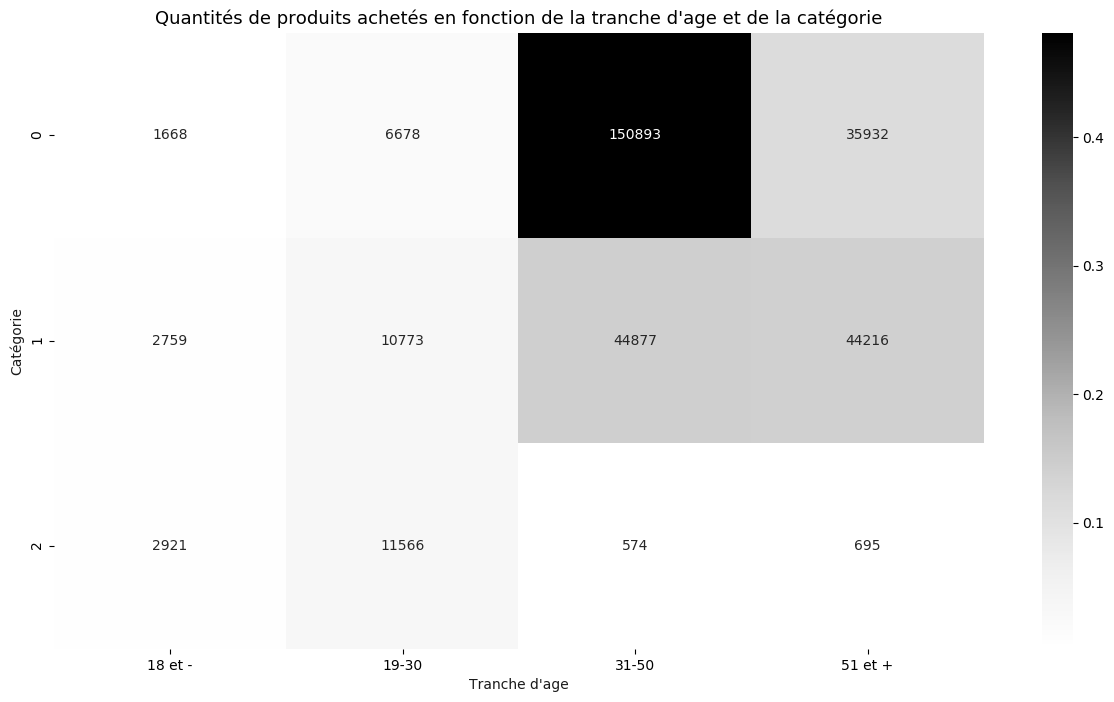

In [141]:
import seaborn as sns
plt.figure(figsize = (15,8))
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data2)

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = c/n
sns.heatmap(measure.iloc[:-1,:-1],annot=c.iloc[:-1,:-1], cmap="Greys", cbar=True,fmt='g')
plt.title("Quantités de produits achetés en fonction de la tranche d'age et de la catégorie", fontsize=13)
plt.ylabel("Catégorie",color="k",fontsize=10)
plt.xlabel("Tranche d'age",color="k",fontsize=10)
print(measure)
#plt.savefig("30.jpg",bbox="tight")
plt.show()

In [142]:
#Chiffre d'affaire généré en fonction de la tranche d'age et de la catégorie##
#Tableau de contingeance % des ventes par categorie et tranche d age(couleurs) ##

In [143]:
temp = data2[["categ","groupe_age","price"]].copy()
c = temp.pivot_table(
    index=["categ"],
    columns = ["groupe_age"], values=["price"], aggfunc=sum,margins=True,margins_name="Total")
del temp

               price                                        
groupe_age   18 et -     19-30     31-50   51 et +     Total
categ                                                       
0           0.003286  0.013322  0.299453  0.071359  0.387420
1           0.010615  0.041015  0.171176  0.169085  0.391891
2           0.041182  0.161772  0.008117  0.009619  0.220689
Total       0.055082  0.216110  0.478746  0.250063  1.000000


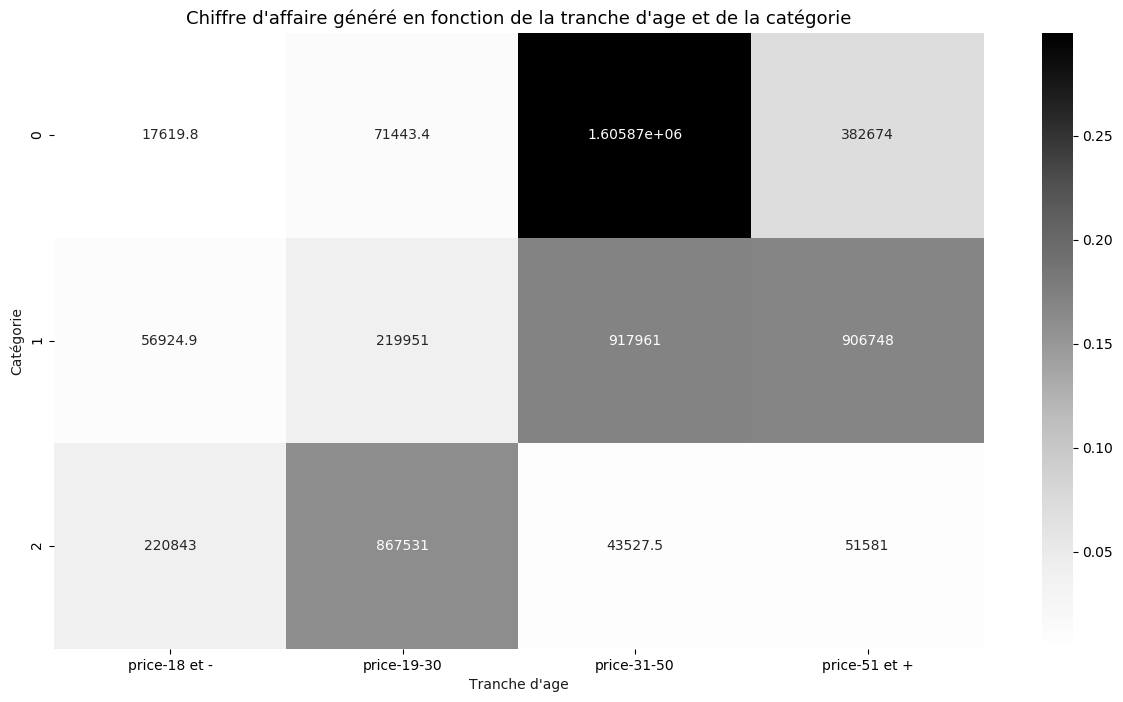

In [144]:
import seaborn as sns
plt.figure(figsize = (15,8))
tx = c.loc[:,["Total"]]
ty = c.loc[["Total"],:]
n = data2["price"].sum().copy()

measure = c/n
sns.heatmap(measure.iloc[:-1,:-1],annot=c.iloc[:-1,:-1], cmap="Greys", cbar=True,fmt='g')
plt.title("Chiffre d'affaire généré en fonction de la tranche d'age et de la catégorie", fontsize=13)
plt.ylabel("Catégorie",color="k",fontsize=10)
plt.xlabel("Tranche d'age",color="k",fontsize=10)
print(measure)
#plt.savefig("31.jpg",bbox="tight")
plt.show()